In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Google I/O 2025 - Live coding experiences with the Gemini API

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/IO2025_Gemini_API_live_coding.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

Welcome to the official Colab notebook from the **Google I/O 2025 live coding session** on the Gemini API!

This notebook serves as a comprehensive, hands-on guide to exploring the cutting-edge capabilities of the Gemini models, as demonstrated live during the presentation. You will dive deep into how developers can leverage the Gemini API to build powerful, innovative, and highly intelligent AI-powered applications.

Throughout this interactive session, you'll find practical demonstrations covering the **latest advancements** in Gemini, including:

*   **Generative Media (GenMedia models):** Learn to create stunning images with **Imagen3** and the experimental **Gemini 2.0 Flash image generation**, and generate dynamic videos with the powerful **Veo2** model.
*   **Advanced Multimodality:** Understand and generate content across various modalities, seamlessly combining text, images, and videos in your prompts and responses.
*   **Text-to-Speech (TTS):** Transform written text into natural-sounding audio, exploring customizable voices, language options, and even multi-speaker dialogues.
*   **Intelligent Tool Use:** Empower Gemini with built-in tools like **Code Execution** (for solving complex problems in a sandbox), real-time **grounding via Google Search**, and **URL context** to interact with external systems and fetch factual information directly from the web.
*   **Adaptive Thinking & Agentic Solutions:** Discover how Gemini models can perform internal reasoning and problem-solving with their **thinking capability**, and how to build complex, multi-step AI agents using the **Google Agent Development Kit (ADK)** for advanced use cases.

This notebook is designed to be fully runnable, allowing you to execute the code, experiment with different prompts, and directly experience the versatility and power of the Gemini API. Get ready to unlock new possibilities and code the future!

## Setup

Before diving into the exciting world of Gemini API, we need to set up our environment. This involves installing the necessary SDK and configuring your API key.

### Install SDK

The `google-genai` Python SDK is essential for interacting with the Gemini API. This SDK provides a streamlined way to access different Gemini models and their functionalities.

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -U -q 'google-genai>=1.16'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.3/196.3 kB 4.9 MB/s eta 0:00:00


### Setup your API key

To authenticate your requests with the Gemini API, you need an API key. This key allows you to access Google's powerful generative AI models. It's recommended to store your API key securely, for instance, as a Colab Secret named `GOOGLE_API_KEY`.

If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the `google-genai` SDK, initializing the client is straightforward. You pass your API key to `genai.Client`, and the client handles communication with the Gemini API. Individual model settings are then applied in each API call.

In [ ]:
import time
from google import genai
from google.genai import types
from IPython.display import Video, HTML, Markdown, Image

client = genai.Client(api_key=GOOGLE_API_KEY)

# Working with GenMedia models

The Gemini API offers access to various GenMedia models, enabling advanced capabilities like generating images and videos from text prompts. These models push the boundaries of what's possible in creative content generation.

## Generating images with Imagen3

[Imagen 3](https://ai.google.dev/gemini-api/docs/imagen) is Google's most advanced text-to-image model, capable of producing highly detailed images with rich lighting and fewer artifacts than previous versions. It excels in scenarios where image quality and specific artistic styles are paramount.

<!-- Warning Badge -->
<table>
  <tr>
    <!-- Emoji -->
    <td bgcolor="#f5949e">
      <font size=30>⚠️</font>
    </td>
    <!-- Text Content Cell -->
    <td bgcolor="#f5949e">
      <h3><font color=black>Imagen is a paid-only feature and won't work if you are on the free tier.</font></h3>
    </td>
  </tr>
</table>

### Select the Imagen3 model to be used

The `imagen-3.0-generate-002` model is specifically designed for high-quality image generation from textual prompts.

In [ ]:
MODEL_ID = "imagen-3.0-generate-002" # @param {isTemplate: true}

### Imagen3 image generation prompt

When generating images with Imagen 3, you provide a descriptive prompt to guide the output. You can also specify parameters like the number of images, person_generation (to allow or disallow generating images of people), and aspect_ratio for different output dimensions.

In [ ]:
%%time

prompt = """
  Dynamic anime illustration: A happy Brazilian man with short grey hair and a
  grey beard, mid-presentation at a tech conference. He's wearing a fun blue
  short-sleeve shirt covered in mini avocado prints. Capture a funny, energetic
  moment where he's clearly enjoying himself, perhaps with an exaggerated joyful
  expression or a humorous gesture, stage background visible.
"""

number_of_images = 1 # @param {type:"slider", min:1, max:4, step:1}
person_generation = "ALLOW_ADULT" # @param ['DONT_ALLOW', 'ALLOW_ADULT']
aspect_ratio = "1:1" # @param ["1:1", "3:4", "4:3", "16:9", "9:16"]

result = client.models.generate_images(
    model=MODEL_ID,
    prompt=prompt,
    config=dict(
        number_of_images=number_of_images,
        output_mime_type="image/jpeg",
        person_generation=person_generation,
        aspect_ratio=aspect_ratio
    )
)

CPU times: user 82.6 ms, sys: 13 ms, total: 95.6 ms
Wall time: 4.59 s


After generation, the `result.generated_images` object contains the generated images, which can then be displayed.

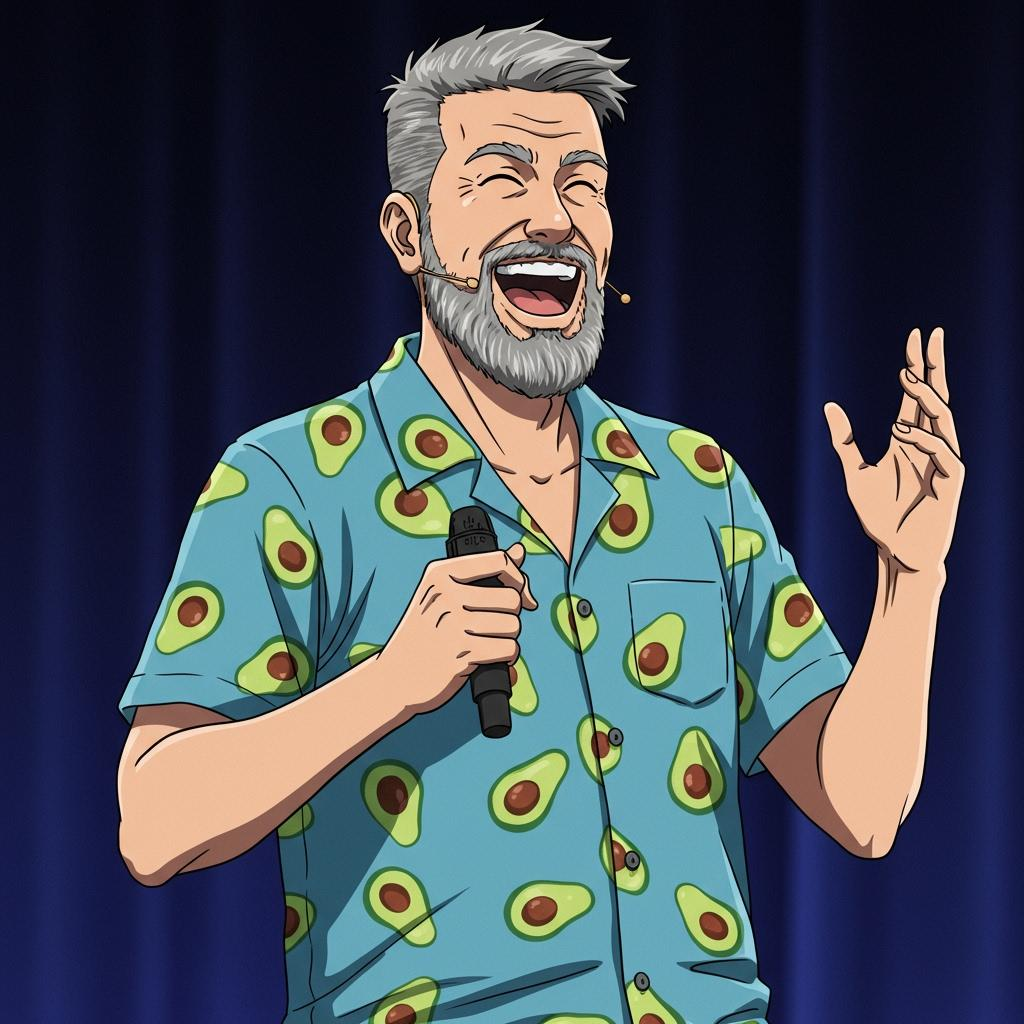

In [ ]:
for generated_image in result.generated_images:
  imagen_image = generated_image.image.show()

## Generating images with Gemini 2.0 Flash image out model (experimental)


The `gemini-2.0-flash-preview-image-generation model` extends Gemini's multimodal capabilities to include conversational image generation and editing. This model can generate images along with text responses, making it highly versatile for mixed-media content creation.

### Select the Gemini 2.0 image out model

This model is specifically designed for generating and editing images conversationally.

In [ ]:
MODEL_ID = "gemini-2.0-flash-preview-image-generation"

### Gemini 2.0 Flash image generation prompt (with interleaved text)

This example demonstrates how Gemini 2.0 Flash can generate both text and images in an interleaved fashion, providing a rich, conversational output that combines instructions with visual aids. You must explicitly set response_modalities to `['Text', 'Image']` to enable this feature.

In [ ]:
%%time

contents = """
  Show me how to cook a Brazilian cuscuz with coconut milk and grated coconut.
  Include detailed step by step guidance with images.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=contents,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

CPU times: user 459 ms, sys: 53.7 ms, total: 513 ms
Wall time: 19.6 s


The output `response.candidates.content.parts` can contain both text and inline image data, which are then displayed accordingly.

In [ ]:
for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      print(mime)
      data = part.inline_data.data
      display(Image(data=data, width=512, height=512))

### Gemini 2.0 Flash image generation prompt

This example focuses on generating an image based on a descriptive text prompt, similar to Imagen 3, but utilizing the Gemini 2.0 Flash model's capabilities for image generation within a text-based generation flow.

In [ ]:
%%time

prompt = """
  Dynamic anime illustration: A happy Brazilian man with short grey hair and a
  grey beard, mid-presentation at a tech conference. He's wearing a fun blue
  short-sleeve shirt covered in mini avocado prints. Capture a funny, energetic
  moment where he's clearly enjoying himself, perhaps with an exaggerated joyful
  expression or a humorous gesture, stage background visible.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

CPU times: user 112 ms, sys: 6.52 ms, total: 118 ms
Wall time: 3.5 s


The generated content is then processed to display the image parts.

image/png


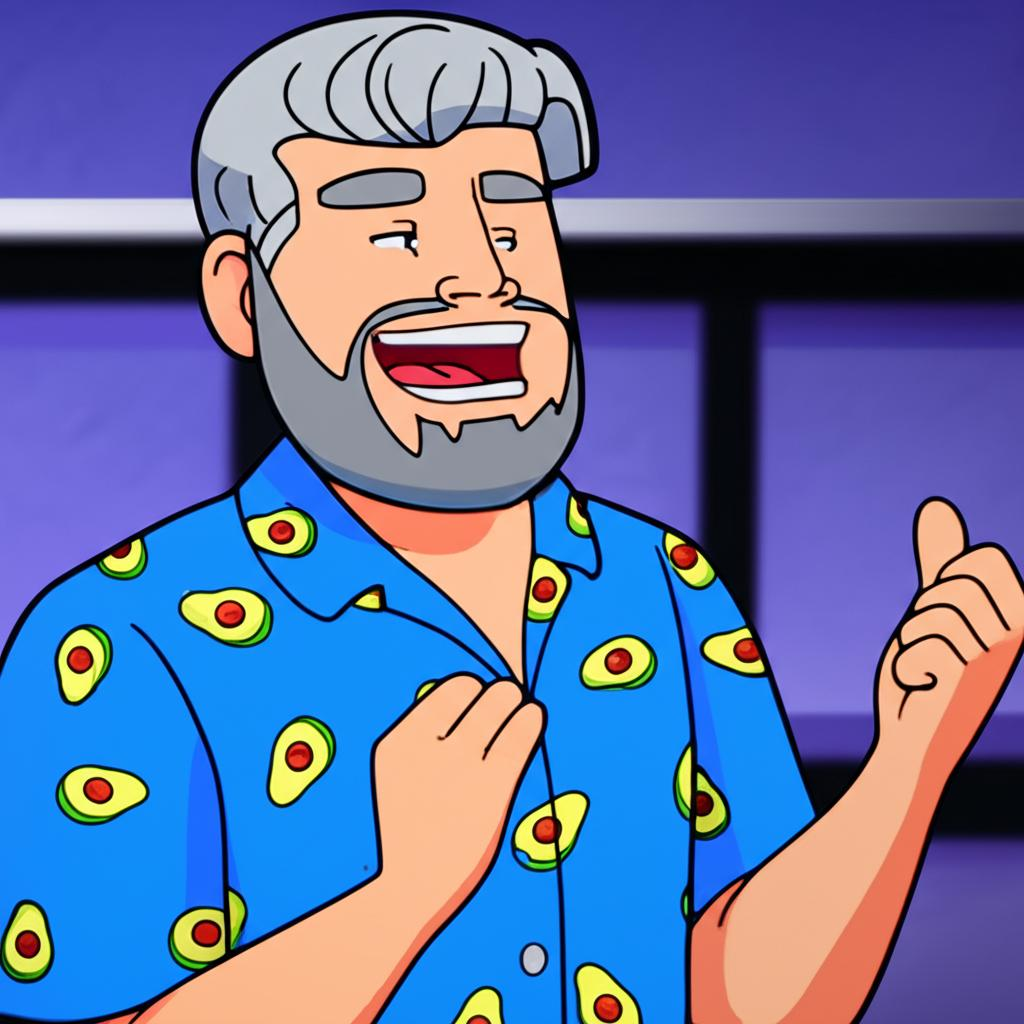

In [ ]:
for part in response.candidates[0].content.parts:
  if part.inline_data is not None and part.inline_data.mime_type is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

#### Saving the generated image

The generated image data can be extracted from the response and saved locally, typically as a PNG file.

In [ ]:
import pathlib

for part in response.candidates[0].content.parts:
    if part.text is not None:
      continue
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      data = part.inline_data.data
      pathlib.Path("gemini_imgout.png").write_bytes(data)

### Editing images with Gemini 2.0 Flash image out

Gemini 2.0 Flash also supports image editing. You can provide an image as input along with a text prompt describing the desired modifications. This allows for conversational image manipulation.

In [ ]:
%%time

import PIL

prompt = """
  make the image background in full white and add a wireless presentation
  clicker on the hand of the person
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        PIL.Image.open('gemini_imgout.png')
    ],
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

CPU times: user 678 ms, sys: 15.6 ms, total: 694 ms
Wall time: 5.79 s


The edited image and any accompanying text are then displayed.

image/png


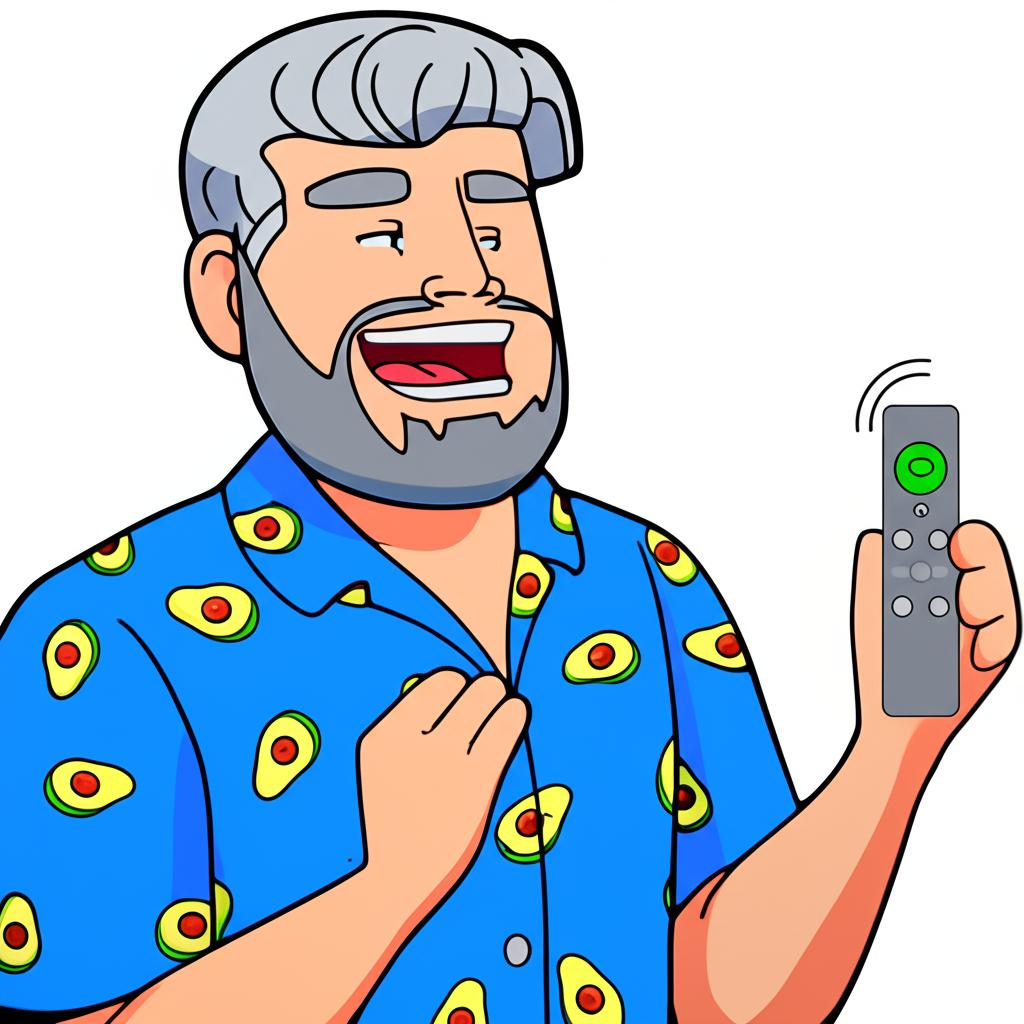

In [ ]:
for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      print(mime)
      data = part.inline_data.data
      display(Image(data=data))

The edited image is saved, overwriting the previous `gemini_imgout.png` file (for future usage in this notebook).

In [ ]:
for part in response.candidates[0].content.parts:
    if part.text is not None:
      continue
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      data = part.inline_data.data
      pathlib.Path("gemini_imgout.png").write_bytes(data)

## Generating videos with the Veo2 model

Veo 2 is Google's advanced text-to-video and image-to-video model, capable of generating high-quality videos with detailed cinematic and visual styles. It can capture prompt nuances and maintain consistency across frames.
<br/>
<br/>

<!-- Princing warning Badge -->
<table>
  <tr>
    <!-- Emoji -->
    <td bgcolor="#f5949e">
      <font size=30>⚠️</font>
    </td>
    <!-- Text Content Cell -->
    <td bgcolor="#f5949e">
      <h3><font color=black>Veo is a paid-only feature and won't work if you are on the free tier.<br></font></h3>
    </td>
  </tr>
</table>

### Select the Veo2 model to be used

The `veo-2.0-generate-001` model is used for video generation tasks.

In [ ]:
VEO_MODEL_ID = "veo-2.0-generate-001"

### Run a text-to-video generation prompt

This section demonstrates how to generate videos directly from a text prompt. You can specify various configurations like `person_generation`, `aspect_ratio`, `number_of_videos`, `duration`, and a `negative_prompt` to guide the video generation process. Video generation is an asynchronous operation, so the code includes a loop to wait for the operation to complete.

In [ ]:
%%time

import time
from google.genai import types
from IPython.display import Video, HTML

prompt = """
  Dynamic anime scene: A happy Brazilian man with short grey hair and a
  grey beard, mid-presentation at a tech conference. He's wearing a fun blue
  short-sleeve shirt covered in mini avocado prints. Capture a funny, energetic
  moment where he's clearly enjoying himself, perhaps with an exaggerated joyful
  expression or a humorous gesture, stage background visible.
"""

# Optional parameters
negative_prompt = "" # @param {type: "string"}
person_generation = "allow_adult"  # @param ["dont_allow", "allow_adult"]
aspect_ratio = "16:9" # @param ["16:9", "9:16"]
number_of_videos = 1 # @param {type:"slider", min:1, max:4, step:1}
duration = 8 # @param {type:"slider", min:5, max:8, step:1}

operation = client.models.generate_videos(
    model=VEO_MODEL_ID,
    prompt=prompt,
    config=types.GenerateVideosConfig(
      # At the moment the config must not be empty
      person_generation=person_generation,
      aspect_ratio=aspect_ratio,  # 16:9 or 9:16
      number_of_videos=number_of_videos, # supported value is 1-4
      negative_prompt=negative_prompt,
      duration_seconds=duration, # supported value is 5-8
    ),
)

# Waiting for the video(s) to be generated
while not operation.done:
    time.sleep(20)
    operation = client.operations.get(operation)
    print(operation)

print(operation.result.generated_videos)

name='models/veo-2.0-generate-001/operations/zmrlsiqnzaw2' metadata=None done=None error=None response=None result=None
name='models/veo-2.0-generate-001/operations/zmrlsiqnzaw2' metadata=None done=True error=None response=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p0w3cekzjwdc:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None) result=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p0w3cekzjwdc:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None)
[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p0w3cekzjwdc:download?alt=media, video_bytes=None, mime_type=None))]
CPU times: user 188 ms, sys: 37.1 ms, total: 225 ms
Wall time: 40.7 s


### See the video generation results

Once the video generation operation is complete, the generated video(s) can be downloaded and displayed within the notebook. Generated videos are stored for 2 days on the server, so it's important to save a local copy if needed.

In [ ]:
for n, generated_video in enumerate(operation.result.generated_videos):
  client.files.download(file=generated_video.video)
  generated_video.video.save(f'video{n}.mp4') # Saves the video(s)
  display(generated_video.video.show()) # Displays the video(s) in a notebook

### Run a image-to-video generation prompt

Veo 2 can also generate videos from an input image, using the image as the starting frame. This allows you to bring static images to life by adding motion and narrative based on a text prompt.

In [ ]:
%%time

import io
from PIL import Image

prompt = """
  Dynamic anime scene: A happy Brazilian man with short grey hair and a
  grey beard, mid-presentation at a tech conference. He's wearing a fun blue
  short-sleeve shirt covered in mini avocado prints. Capture a funny, energetic
  moment where he's clearly enjoying himself, perhaps with an exaggerated joyful
  expression or a humorous gesture, stage background visible.
"""

image_name = "gemini_imgout.png"

# Optional parameters
negative_prompt = "ugly, low quality" # @param {type: "string"}
aspect_ratio = "16:9" # @param ["16:9", "9:16"]
number_of_videos = 1 # @param {type:"slider", min:1, max:4, step:1}
duration = 8 # @param {type:"slider", min:5, max:8, step:1}

# Loading the image
im = Image.open(image_name)

# converting the image to bytes
image_bytes_io = io.BytesIO()
im.save(image_bytes_io, format=im.format)
image_bytes = image_bytes_io.getvalue()

operation = client.models.generate_videos(
    model=VEO_MODEL_ID,
    prompt=prompt,
    image=types.Image(image_bytes=image_bytes, mime_type=im.format),
    config=types.GenerateVideosConfig(
      # At the moment the config must not be empty
      aspect_ratio = aspect_ratio,  # 16:9 or 9:16
      number_of_videos = number_of_videos, # supported value is 1-4
      negative_prompt = negative_prompt,
      duration_seconds = duration, # supported value is 5-8
    ),
)

# Waiting for the video(s) to be generated
while not operation.done:
    time.sleep(20)
    operation = client.operations.get(operation)
    print(operation)

print(operation.result.generated_videos)

name='models/veo-2.0-generate-001/operations/7rz7rsx527t2' metadata=None done=None error=None response=None result=None
name='models/veo-2.0-generate-001/operations/7rz7rsx527t2' metadata=None done=True error=None response=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p4yyv2k2oso2:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None) result=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p4yyv2k2oso2:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None)
[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/p4yyv2k2oso2:download?alt=media, video_bytes=None, mime_type=None))]
CPU times: user 670 ms, sys: 27.9 ms, total: 698 ms
Wall time: 41.4 s


The generated videos are then saved and displayed.

In [ ]:
for n, generated_video in enumerate(operation.result.generated_videos):
  client.files.download(file=generated_video.video)
  generated_video.video.save(f'video{n}.mp4') # Saves the video(s)
  display(generated_video.video.show()) # Displays the video(s) in a notebook

## Generating text-to-speech (TTS) with Gemini models

The Gemini API offers native text-to-speech (TTS) capabilities, allowing you to transform text into natural-sounding audio. This feature provides fine-grained control over various aspects of speech, including style, accent, pace, and tone.

### Select the TTS model to be used

The `gemini-2.5-flash-preview-tts` and `gemini-2.5-pro-preview-tts` models are optimized for low-latency, controllable audio generation, supporting both single-speaker and multi-speaker outputs.

In [ ]:
MODEL_ID = "gemini-2.5-flash-preview-tts" # @param ["gemini-2.5-flash-preview-tts","gemini-2.5-pro-preview-tts"] {"allow-input":true, isTemplate: true}

In [ ]:
# @title Helper functions (just run that cell)

import contextlib
import wave
from IPython.display import Audio

file_index = 0

@contextlib.contextmanager
def wave_file(filename, channels=1, rate=24000, sample_width=2):
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(rate)
        yield wf

def play_audio_blob(blob):
  global file_index
  file_index += 1

  fname = f'audio_{file_index}.wav'
  with wave_file(fname) as wav:
    wav.writeframes(blob.data)

  return Audio(fname, autoplay=True)

def play_audio(response):
    return play_audio_blob(response.candidates[0].content.parts[0].inline_data)

### Generating a simple audio output

his example demonstrates the basic text-to-speech functionality, converting a simple text string into an audio output. The response_modalities configuration is set to `['Audio']`.

In [ ]:
%%time

response = client.models.generate_content(
  model=MODEL_ID,
  contents="Say 'hello there! My name is Gemini and I'm really glad to be here at the Google I/O 2025!!'",
  config={"response_modalities": ['Audio']},
)
print(response)

blob = response.candidates[0].content.parts[0].inline_data
play_audio_blob(blob)

### Controlling how the model speaks

The Gemini TTS models allow you to control the style, tone, accent, and pace of the generated speech using natural language prompts within the contents and by selecting a specific `voice_name` from a variety of prebuilt voices.

In [ ]:
%%time

voice_name = "Sadaltager" # @param ["Zephyr", "Puck", "Charon", "Kore", "Fenrir", "Leda", "Orus", "Aoede", "Callirhoe", "Autonoe", "Enceladus", "Iapetus", "Umbriel", "Algieba", "Despina", "Erinome", "Algenib", "Rasalgethi", "Laomedeia", "Achernar", "Alnilam", "Schedar", "Gacrux", "Pulcherrima", "Achird", "Zubenelgenubi", "Vindemiatrix", "Sadachbia", "Sadaltager", "Sulafar"]

response = client.models.generate_content(
  model=MODEL_ID,
  contents="""Say "I am a very knowlegeable model, especially when using grounding", wait 3 seconds, while counting from one to three, then say "Don't you think?".""",
  config={
      "response_modalities": ['Audio'],
      "speech_config": {
          "voice_config": {
              "prebuilt_voice_config": {
                  "voice_name": voice_name
              }
          }
      }
  },
)

play_audio(response)

### Changing the audio language

The TTS models can automatically detect the input language and generate speech in that language. They support a wide range of languages.

In [ ]:
%%time

response = client.models.generate_content(
  model=MODEL_ID,
  contents="""
    Read this in Brazilian portuguese:
    A comida brasileira é a melhor do mundo!
  """,
  config={"response_modalities": ['Audio']},
)
play_audio(response)

You can also instruct the model to read text in a particular style or pace, as demonstrated in this disclaimer reading example.

In [ ]:
%%time

response = client.models.generate_content(
  model=MODEL_ID,
  contents="""
    Read this disclaimer in as fast a voice as possible:

    [The author] assumes no responsibility or liability for any errors or omissions in the content of this site.
    The information contained in this site is provided on an 'as is' basis with no guarantees of completeness, accuracy, usefulness or timeliness
  """,
  config={"response_modalities": ['Audio']},
)

play_audio(response)

### Working with multi-speakers

For conversations or scenarios requiring multiple distinct voices, the Gemini TTS models support multi-speaker audio generation. You define different speakers within the MultiSpeakerVoiceConfig and assign specific voices to them. The model can then process a transcript and assign parts to each speaker. First, a sample transcript is generated by a Gemini text model.


In [ ]:
%%time

transcript = client.models.generate_content(
    model='gemini-2.5-flash',
    contents="""
      Generate a short (like 100 words) transcript that reads like
      it was clipped from a podcast by excited computer scientists talking
      about all the AI (including Gemini 2.5 models) news announced at Google I/O 2025.
      Highlight the fact that the live coding session with Luciano Martins was the best.
    """
  ).text

print(transcript)

**Speaker A:** Okay, so, Google I/O 2025? Absolute mind-blow. Seriously, my brain’s still buzzing from all the AI announcements!

**Speaker B:** Right?! Gemini 2.5 alone… the *on-device* multimodality was unreal. And the performance gains across the whole stack? Unbelievable! The new agentic capabilities are going to change everything.

**Speaker A:** Totally! But seriously, forget the keynotes for a sec. The *highlight* for me? Hands down, Luciano Martins’ live coding session.

**Speaker B:** YES! That was next level! He just *built* a fully agentic workflow with the new Gemini 2.5 APIs in like, 10 minutes, *live*, with zero hiccups. That's the real magic. Forget the shiny demos; that's the part that truly blew my mind! Best session of the whole conference.
CPU times: user 38 ms, sys: 2.05 ms, total: 40 ms
Wall time: 6.46 s


Then, the generated transcript is passed to the TTS model with multi-speaker configuration.

In [ ]:
%%time

config = types.GenerateContentConfig(
    response_modalities=["AUDIO"],
    speech_config=types.SpeechConfig(
        multi_speaker_voice_config=types.MultiSpeakerVoiceConfig(
            speaker_voice_configs=[
                types.SpeakerVoiceConfig(
                    speaker='Podcast host',
                    voice_config=types.VoiceConfig(
                        prebuilt_voice_config=types.PrebuiltVoiceConfig(
                            voice_name='sulafat',
                        )
                    )
                ),
                types.SpeakerVoiceConfig(
                    speaker='Podcast guest',
                    voice_config=types.VoiceConfig(
                        prebuilt_voice_config=types.PrebuiltVoiceConfig(
                            voice_name='leda',
                        )
                    )
                ),
            ]
        )
    )
)

response = client.models.generate_content(
  model=MODEL_ID,
  contents="TTS the following conversation between a very excited Podcast host and the Podcast guest: "+transcript,
  config=config,
)
print(response)
play_audio(response)

## Working with the Gemini 2.5 models

The Gemini 2.5 series models, including Flash and Pro, offer enhanced capabilities such as adaptive thinking, multimodal understanding, and advanced reasoning, making them suitable for a wide range of complex tasks.

### Counting token

Token counting helps you understand the length of your input and output, which is relevant for managing model context windows and estimating costs. A token is roughly equivalent to 4 characters for Gemini models.

In [ ]:
MODEL_ID = "gemini-2.5-flash"

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What is the venue where Google I/O normally happens?",
)

print(response)

total_tokens=13 cached_content_token_count=None


### Sending your first prompt

Making a request to a Gemini model is straightforward using the generate_content method. You specify the model and the content (your prompt), and the model returns a text response.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What is the venue where Google I/O normally happens?"
)

display(Markdown(response.text))
print()
response.usage_metadata

Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.

GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=22, candidates_tokens_details=None, prompt_token_count=13, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=13)], thoughts_token_count=375, tool_use_prompt_token_count=None, tool_use_prompt_tokens_details=None, total_token_count=410, traffic_type=None)

### Your first streaming interaction

For more fluid interactions, especially with longer responses, you can use streaming. The `generate_content_stream` method allows you to receive parts of the response incrementally as they are generated, rather than waiting for the entire output.

In [ ]:
from IPython.display import Markdown

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a software engineer attending Google I/O for the first time"
):
  print(response.text, end="")

Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amphitheatre** in **Mountain View, California**.Google I/O normally happens at the **Shoreline Amp

### Working with multimodal prompts

Gemini models are inherently multimodal, meaning they can process and generate content based on various input types, including text, images, video, and audio. This example demonstrates how to provide an image alongside a text prompt.

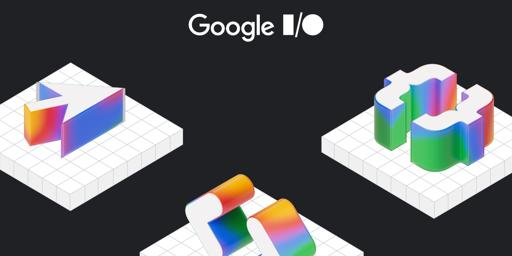

In [ ]:
import requests
import pathlib
from PIL import Image

img = "https://storage.googleapis.com/gweb-developer-goog-blog-assets/images/developer-keynote-recap-google-io.2e16d0ba.fill-1200x600.png"

img_bytes = requests.get(img).content

img_path = pathlib.Path('image.png')
img_path.write_bytes(img_bytes)

image = Image.open(img_path)
image.thumbnail([512,512])

display(image)

The image and a textual prompt are combined to ask the model to describe the image.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Describe this image"
    ]
)

Markdown(response.text)

This image is a sleek, modern, and abstract graphic, likely promotional material for Google I/O, a developer conference.

Here's a detailed description:

*   **Overall Composition:** The image features a minimalist, dark background (appears to be a very dark gray or black) which provides strong contrast for the foreground elements. The composition is dynamic, with three main visual clusters arranged diagonally.
*   **Branding:** At the top center, the text "Google I/O" is displayed in clean, white sans-serif font. The "I/O" portion is stylized, with the "I" as a vertical bar and the "O" as a perfect circle, consistent with the Google I/O logo.
*   **Platforms/Bases:** Three distinct, white, square-like platforms are positioned in the foreground, rendered with an isometric projection, giving them a three-dimensional, blocky appearance. Each platform has a subtle grid pattern on its top surface, suggesting a technical or computational theme (like graph paper or a digital grid).
*   **3D Objects:** On each platform, there's a unique, three-dimensional geometric object:
    *   **Top-Left:** A sharp, angular object resembling an arrow or a folded plane, pointing diagonally upwards and to the right.
    *   **Top-Right:** Two stylized, curved shapes that resemble an "f" or a flowing, intertwined symbol. They appear to be mirrored or interlocked.
    *   **Bottom-Middle (partially visible):** Two chunky, interlocked "L" shapes, which are also rounded and volumetric.
*   **Color Scheme & Texture:** The 3D objects are the most striking visual element, featuring a vibrant, smooth gradient that cycles through the full spectrum of rainbow colors (red, orange, yellow, green, blue, purple). This gradient gives them a iridescent, almost reflective quality, suggesting dynamism, creativity, and a broad range of applications. The lighting on these objects emphasizes their three-dimensionality, creating distinct surfaces and shadows.
*   **Implied Themes:** The overall aesthetic conveys themes of technology, innovation, development, and connectivity, with a clean and futuristic feel. The isometric projection and grid patterns hint at architecture, coding, or system design.

Here, the model is asked to generate a blog post based on the provided image, showcasing its creative content generation capabilities from multimodal input.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

Markdown(response.text)

## Unveiling Google I/O: The Future, Built in Full Color

As the digital world hums with anticipation, a familiar sight emerges on our screens: the vibrant, geometric invitation to Google I/O. More than just a conference, I/O is a beacon for developers, innovators, and anyone curious about the cutting edge of technology. And this year's visual really sets the stage for what's to come.

This striking image isn't just eye candy; it's a visual metaphor. The precise isometric grid serves as our digital canvas, a stable foundation upon which new ideas are built. Rising from it are dynamically colored, three-dimensional shapes – reminiscent of building blocks, lines of code, or perhaps even abstract representations of new APIs and frameworks. We see a sharp arrow pointing forward, signaling progress and new directions, alongside playful 'f' shapes that might hint at Flutter or Firebase, and other abstract forms hinting at the vast ecosystem Google empowers.

The rainbow gradients splashed across their surfaces don't just add vibrancy; they symbolize the diverse spectrum of technologies, ideas, and people that converge at I/O. From AI advancements to Android updates, from web innovations to cloud solutions, Google I/O is where these disparate elements come together to form a cohesive, colorful future.

At its heart, Google I/O is where the magic happens. It's where Google unveils its latest advancements, hosts deep-dive technical sessions, and delivers keynote announcements that often define the trajectory of the tech landscape for the year ahead. But beyond the big reveals, I/O fosters a unique sense of community, connecting developers with the tools, insights, and each other to turn ambitious ideas into reality.

So, as we look at this vivid imagery, let it serve as a reminder: Google I/O isn't just an event to watch; it's an invitation to participate. It's about empowering creators, fostering collaboration, and collectively shaping the digital experiences of tomorrow. Whether you're a seasoned developer or simply fascinated by what's next, prepare to be inspired. The future is being built, block by colorful block, and Google I/O is where we get to see it unfold. Get ready to dive in!

## Video understanding with Gemini models

Gemini models can process and understand video content, enabling a wide range of use cases such as describing scenes, extracting information, answering questions about video content, and referring to specific timestamps.

First, a sample video is downloaded, then uploaded using the `client.files.upload` method, which is suitable for larger videos or for reusing the video across multiple requests.

In [ ]:
import time

!wget https://storage.googleapis.com/generativeai-downloads/videos/Jukin_Trailcam_Videounderstanding.mp4 -O Trailcam.mp4 -q

def upload_video(video_file_name):
  video_file = client.files.upload(file=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(5)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)
  print(f'Video processing complete: ' + video_file.uri)

  return video_file

trailcam_video = upload_video('Trailcam.mp4')

Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/zyg3jyh4pdm9


### Do a semantic search in the video

You can prompt the model to analyze video content for specific information, such as organizing scenes, identifying objects, and estimating emotional states. The model processes both the visual frames and the audio track to provide a comprehensive understanding.

In [ ]:
%%time

prompt = """
  Organize all scenes from this video in a table, along with timecode, a short
  description, a list of objects visible in the scene (with representative emojis)
  and an estimation of the level of excitement on a scale of 1 to 10
"""
video = trailcam_video

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video,
        prompt,
    ]
)

Markdown(response.text)

CPU times: user 91.1 ms, sys: 14.8 ms, total: 106 ms
Wall time: 18 s


Here's a detailed log of the video scenes:

| Timecode | Description | Objects | Excitement (1-10) |
|---|---|---|---|
| 00:00 | Close-up of a gray fox's fur as it moves away from the camera. | 🦊 | 3 |
| 00:01 | Two gray foxes approach and sniff around rocks and fallen leaves. | 🦊🦊, 🪨, 🍂 | 5 |
| 00:11 | One fox jumps onto a rock while the other continues sniffing around. | 🦊🦊, 🪨, 🍂 | 6 |
| 00:17 | A mountain lion walks towards the camera, sniffing the ground. (Night vision) | 🦁, 🌳, 🍂 | 7 |
| 00:34 | Two gray foxes move around, one gets spooked by the camera flash and jumps. (Night vision) | 🦊🦊, 🌳, 🍂, 💥 | 8 |
| 00:50 | Another camera flash, then two mountain lions appear, one chasing the other. (Night vision) | 🦁🦁, 🪨, 💥 | 9 |
| 01:04 | A mountain lion walks past the camera, looks back, and then continues walking away. (Night vision) | 🦁, 🌳, 🪨 | 7 |
| 01:17 | Two mountain lions are in the frame, one approaching the camera and the other further back. (Night vision) | 🦁🦁, 🌳, 🪨 | 8 |
| 01:29 | A bobcat is seen sniffing around the ground in the darkness. (Night vision) | 🐱, 🌳, 🍂 | 6 |
| 01:51 | A black bear walks towards the camera, sniffs the ground, and then walks past. | 🐻, 🌳, 🍂 | 7 |
| 01:57 | A mountain lion walks quickly across the frame from left to right. (Night vision) | 🦁, 🌳, 🍂 | 6 |
| 02:04 | A large bear walks past the camera. | 🐻, 🌳, 🍂 | 6 |
| 02:12 | Two bears appear, one large and one smaller (possibly a cub). The large one sniffs and then walks away. | 🐻🐻, 🌳, 🍂 | 7 |
| 02:23 | A gray fox is on a hill overlooking a city at night, sniffing the ground. (Night vision) | 🦊, 🏙️, 🌃 | 7 |
| 02:35 | A bear walks across the frame on a hill with city lights in the background. (Night vision) | 🐻, 🏙️, 🌃 | 7 |
| 02:42 | A mountain lion walks across the frame on a hill with city lights in the background. (Night vision) | 🦁, 🏙️, 🌃 | 8 |
| 02:52 | A mountain lion sniffs the ground near a tree and then walks away. (Night vision) | 🦁, 🌳, 🍂 | 6 |
| 03:05 | A large black bear stands in the forest, looking around, then walks away. | 🐻, 🌳, 🍂 | 7 |
| 03:22 | A brown bear stands in the forest, looking around, then walks away. | 🐻, 🌳, 🍂 | 7 |
| 03:32 | A brown bear and a cub are in the forest, sniffing the ground and moving around. | 🐻🐻, 🌳, 🍂 | 8 |
| 03:41 | Two brown bears (a mother and a cub) move through the forest, sniffing the ground. The cub scratches itself. | 🐻🐻, 🌳, 🍂 | 8 |
| 04:03 | A mother brown bear and her cub walk towards the camera, sniffing the ground. | 🐻🐻, 🌳, 🍂 | 8 |
| 04:22 | A bobcat is seen in the forest at night, looking at the camera, then walking away. (Night vision) | 🐱, 🌳, 🍂 | 6 |
| 04:30 | A bobcat appears in the distance, then walks towards and past the camera. (Night vision) | 🐱, 🌳, 🍂 | 6 |
| 04:45 | A bobcat approaches the camera from the distance, then turns and runs away when the flash goes off. (Night vision) | 🐱, 🌳, 🍂, 💥 | 8 |
| 04:50 | A bobcat walks into the frame, sniffs, and then walks away. (Night vision) | 🐱, 🌳, 🍂 | 6 |
| 04:57 | A mountain lion walks towards the camera, sniffs the ground, and then walks past. (Night vision) | 🦁, 🌳, 🍂 | 7 |

### Analyze YouTube videos

The Gemini API can also process publicly available YouTube videos directly by providing their URL. This allows for tasks like summarizing video content or finding specific mentions within the video.

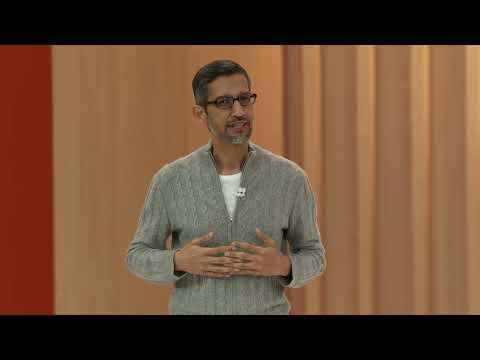

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('ixRanV-rdAQ', width=800, height=600)

The model can find specific instances of words or phrases and provide timestamps and context, as demonstrated by searching for "AI" in Sundar Pichai's keynote from Google IO 2023.

In [ ]:
%%time

response = client.models.generate_content(
    model=MODEL_ID,
    contents=types.Content(
        parts=[
            types.Part(text="Find all the instances where Sundar says \"AI\". Provide timestamps and broader context for each instance."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=ixRanV-rdAQ')
            )
        ]
    )
)

Markdown(response.text)

CPU times: user 251 ms, sys: 43.9 ms, total: 295 ms
Wall time: 52.3 s


Here are all the instances where Sundar Pichai says "AI" in the video, along with timestamps and broader context:

1.  **0:29** - "As you may have heard, **AI** is having a very busy year."
    *   **Context:** Sundar Pichai opens the Google I/O keynote by welcoming the audience and immediately highlights the significant advancements and activity in the field of AI, setting the stage for the presentations that follow.

2.  **0:38** - "Seven years into our journey as an **AI**-first company, we are at an exciting inflection point."
    *   **Context:** He reflects on Google's long-term strategic shift to being an "AI-first company," emphasizing the current moment as a pivotal point for the technology and its potential impact.

3.  **0:45** - "We have an opportunity to make **AI** even more helpful for people, for businesses, for communities, for everyone."
    *   **Context:** Following the declaration of being an "AI-first company," he articulates Google's core mission for AI: to enhance its utility and accessibility for a wide range of users and sectors.

4.  **0:54** - "We've been applying **AI** to make our products radically more helpful for a while."
    *   **Context:** He transitions from the overarching vision to concrete applications, stating that AI has already been integrated into Google's existing products to significantly improve their functionality.

5.  **0:59** - "With generative **AI**, we are taking the next step."
    *   **Context:** Sundar introduces generative AI as the next frontier for Google, implying a significant leap in how their products will evolve, leading into specific examples of generative AI in action.

6.  **1:41** - "Smart Compose led to more advanced writing features powered by **AI**."
    *   **Context:** In the segment discussing Gmail's new "Help me write" feature, he traces the evolution of AI-powered writing tools within Google Workspace, starting with Smart Compose.

7.  **3:03** - "Since the early days of Street View, **AI** has stitched together billions of panoramic images so people can explore the world from their device."
    *   **Context:** During the Maps demonstration, he highlights AI's foundational role in creating Street View by seamlessly combining massive amounts of imagery, enabling virtual exploration.

8.  **3:14** - "At last year’s I/O, we introduced Immersive View, which uses **AI** to create a high-fidelity representation of a place so you can experience it before you visit."
    *   **Context:** Continuing with Maps, he explains how AI is crucial for Immersive View, a feature allowing users to virtually explore locations in a detailed, 3D environment, setting up the new "Immersive View for routes."

9.  **5:16** - "It was one of our first **AI**-native products."
    *   **Context:** Referring to Google Photos, he emphasizes that it was designed from its inception with AI at its core, enabling features like searching photos for specific content (people, objects, etc.).

10. **5:39** - "**AI** advancements give us more powerful ways to do this."
    *   **Context:** After mentioning that billions of images are edited monthly in Google Photos, he explains that new AI advancements are empowering users with even more sophisticated photo editing capabilities, leading into the "Magic Editor" demo.

11. **5:48** - "Magic Eraser, launched first on Pixel, uses **AI**-powered computational photography to remove unwanted distractions."
    *   **Context:** He provides a specific example of an AI feature in Google Photos, showcasing "Magic Eraser's" ability to intelligently remove elements from images.

12. **5:58** - "And later this year, using a combination of semantic understanding and generative **AI**, you can do much more with a new experience called Magic Editor."
    *   **Context:** He introduces "Magic Editor" as an advanced photo editing tool that leverages the power of generative AI and semantic understanding to perform more complex and creative edits.

13. **7:41** - "From Gmail and Photos to Maps, these are just a few examples of how **AI** can help you in moments that matter."
    *   **Context:** Sundar summarizes the product updates he has just shown, emphasizing how AI is being integrated into various Google products to provide helpful and meaningful experiences.

14. **8:24** - "Looking ahead, making **AI** helpful for everyone is the most profound way we will advance our mission."
    *   **Context:** He transitions to Google's overarching mission, stating that making AI universally beneficial is the most impactful way to fulfill their long-term goals.

15. **8:54** - "And finally, by building and deploying **AI** responsibly so that everyone can benefit equally."
    *   **Context:** As one of four key ways Google plans to advance its mission with AI, he stresses the importance of responsible development and deployment to ensure equitable benefits for all.

16. **9:03** - "Our ability to make **AI** helpful for everyone relies on continuously advancing our foundation models."
    *   **Context:** He connects the goal of making AI helpful to the underlying technological progress in foundation models, leading into the announcement of PaLM 2.

17. **12:47** - "PaLM 2 is the latest step in our decade-long journey to bring **AI** in responsible ways to billions of people."
    *   **Context:** He reiterates the long-term commitment to AI development, positioning PaLM 2 as a significant milestone in Google's effort to scale AI responsibly to a global audience.

18. **13:00** - "Looking back at the defining breakthroughs in **AI** over the last decade, these teams have contributed to a significant number of them."
    *   **Context:** He highlights Google's historical contributions to fundamental AI research, showcasing key advancements that have shaped the field over the past ten years.

19. **14:10** - "As we invest in more advanced models, we are also deeply investing in **AI** responsibility."
    *   **Context:** He emphasizes that Google's pursuit of more capable AI models is paired with a strong commitment to ethical and responsible AI development, leading into a discussion of watermarking and metadata.

20. **15:11** - "James will talk about our responsible approach to **AI** later."
    *   **Context:** He previews an upcoming segment by another speaker, highlighting the dedicated focus Google has on addressing the ethical and societal implications of AI.

21. **15:29** - "That's the opportunity we have with Bard, our experiment for conversational **AI**."
    *   **Context:** He introduces Bard as Google's direct conversational AI experiment, emphasizing its potential for user interaction and collaboration.

### Analyze specific parts of videos using clipping intervals


For more focused analysis, you can specify `video_metadata` with `start_offset` and `end_offset` to define clipping intervals. This tells the model to analyze only a specific segment of the video.

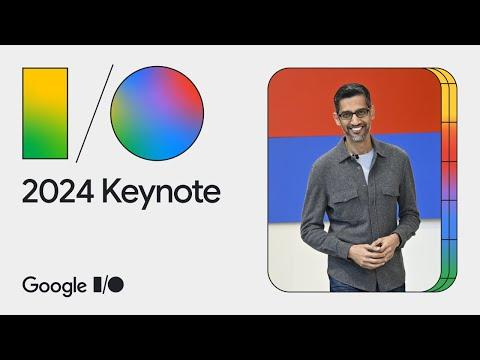

In [ ]:
YouTubeVideo('XEzRZ35urlk', width=800, height=600)

The model will then summarize only the specified segment.

In [ ]:
%%time

response = client.models.generate_content(
    model=MODEL_ID,
    contents=types.Content(
        parts=[
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=XEzRZ35urlk'),
                video_metadata=types.VideoMetadata(
                    start_offset='1250s',
                    end_offset='1570s'
                )
            ),
            types.Part(text='Summarize the video in 3 sentences.')
        ]
    )
)

Markdown(response.text)

CPU times: user 282 ms, sys: 39.8 ms, total: 322 ms
Wall time: 58.7 s


Demis Hassabis shares his lifelong pursuit of Artificial General Intelligence, which led him to co-found DeepMind, now Google DeepMind, with the goal of building AI that can benefit humanity responsibly. He highlights several of DeepMind's recent breakthroughs, including RT-2 for robotics, SIMA for virtual environments, AlphaGeometry for math, GNoME for material discovery, and the new AlphaFold 3 for molecular modeling. Hassabis then introduces Gemini 1.5 Flash, a faster and more efficient multimodal model with a large context window, and unveils "Project Astra," a universal AI agent designed to be helpful in everyday life through quick, natural, and context-aware interactions.

### Customize the number of video frames per second (FPS) analyzed

By default, Gemini models sample videos at 1 frame per second (FPS) for analysis. You can customize this by passing an `fps` argument to `video_metadata`. A higher FPS can capture more details in rapidly changing visuals, while a lower FPS is useful for mostly static videos like lectures.

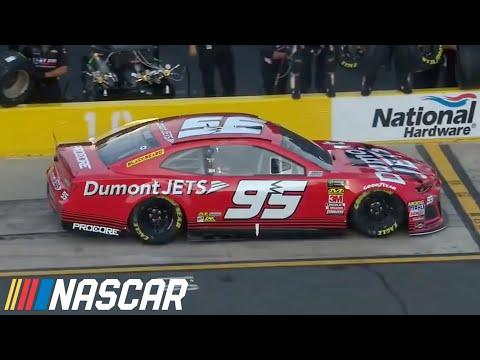

In [ ]:
YouTubeVideo('McN0-DpyHzE', width=800, height=600)

By adjusting the FPS, you can control the granularity of video analysis, which is particularly useful for tasks requiring close attention to visual details.

In [ ]:
%%time

response = client.models.generate_content(
    model=MODEL_ID,
    contents=types.Content(
        parts=[
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=McN0-DpyHzE'),
                video_metadata=types.VideoMetadata(
                    start_offset='15s',
                    end_offset='35s',
                    fps=24
                )
            ),
            types.Part(text='How many tires where changed? Front tires or rear tires?')
        ]
    )
)

Markdown(response.text)

CPU times: user 90.1 ms, sys: 13.8 ms, total: 104 ms
Wall time: 17.8 s


Based on the video, it appears that **all four tires** were changed (both front and both rear).

The pit crew can be seen actively changing tires on both the left and right sides of the car, and the process extends from the front to the rear of the vehicle, indicating a full tire change.

## Working with Tools

The Gemini API enables models to interact with external systems and perform specialized tasks through the use of tools. These tools enhance the model's capabilities by allowing it to execute code, search the web, or process information from specific URLs.

In [ ]:
# @title Helper functions (just run that cell)

from IPython.display import Image, Markdown, Code, HTML

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, width=800, format="png"))
    display(Markdown("---"))

### Code execution

The `code_execution` tool allows the Gemini model to generate and execute Python code. This is particularly useful for tasks requiring precise calculations, data manipulation, or algorithmic problem-solving. The model can iteratively learn from the execution results to refine its output.

In [ ]:
%%time

from IPython.display import Code

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

display_code_execution_result(response)

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

CPU times: user 50.5 ms, sys: 2.96 ms, total: 53.5 ms
Wall time: 6.56 s


### Multimodality with code execution

The code execution tool can be combined with multimodal inputs. This example demonstrates how the model can receive an image (related to the Monty Hall problem) and then generate and execute Python code to simulate the problem, providing a programmatic solution to a visually presented challenge.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0   122k      0 --:--:-- --:--:-- --:--:--  121k


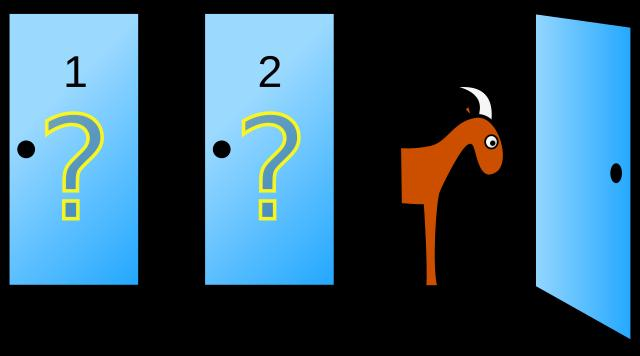

In [ ]:
!curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png

montey_hall_image = PIL.Image.open("montey_hall.png")
montey_hall_image

The model is prompted to run a simulation, demonstrating its ability to reason about a problem and use code to solve it, even with a visual aid as part of the prompt.

In [ ]:
%%time

prompt="""
    Run a simulation of the Monty Hall Problem with 1,000 trials.

    The answer has always been a little difficult for me to understand when people
    solve it with math - so run a simulation with Python to show me what the
    best strategy is.
"""
result = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        montey_hall_image
    ],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

display_code_execution_result(result)

Okay, I can definitely help you understand the Monty Hall Problem through a simulation! It's a classic probability puzzle that often counter-intuitive at first glance.

I will simulate the game 1,000 times for two strategies:
1.  **"Stay" strategy:** The contestant sticks with their initial door choice.
2.  **"Switch" strategy:** The contestant switches to the other unopened door after Monty reveals a goat.

Let's run the simulation!



---

---

Simulation Results over 1000 trials:
  Stay Strategy Wins: 343 (34.30%)
  Switch Strategy Wins: 691 (69.10%)

Based on this simulation, the 'Switch' strategy is the best strategy.


---

The simulation results clearly demonstrate the advantage of the "switch" strategy in the Monty Hall Problem.

Here's a summary of the findings from 1,000 trials:

*   **Stay Strategy Wins:** 343 times (34.30%)
*   **Switch Strategy Wins:** 691 times (69.10%)

As you can see, the **"Switch" strategy resulted in winning approximately double the number of times compared to the "Stay" strategy.**

### Why Switching is the Best Strategy:

The simulation confirms what the mathematical solution shows:

1.  **Your Initial Pick:** When you first choose a door, you have a `1/3` chance of picking the door with the car behind it, and a `2/3` chance of picking a door with a goat.

2.  **Monty's Role:** Monty *always* opens a door that has a goat and is *not* your chosen door. This action provides crucial information.
    *   **If you initially picked the car (1/3 probability):** Monty will open one of the two goat doors. If you switch, you'll switch to a goat and lose.
    *   **If you initially picked a goat (2/3 probability):** Monty *must* open the *other* goat door. This means the remaining unopened door (the one you didn't pick and Monty didn't open) *must* have the car behind it. If you switch, you'll switch to the car and win.

Since you are twice as likely to have initially picked a goat (2/3 chance) than the car (1/3 chance), switching your choice after Monty reveals a goat allows you to win in those 2/3 of scenarios where your initial guess was wrong. You're effectively betting on your initial pick being wrong, which it is most of the time!

---

CPU times: user 112 ms, sys: 17.7 ms, total: 130 ms
Wall time: 14.9 s


### Grounding information with Google Search

The `google_search` tool allows Gemini models to access up-to-date information beyond their training data by querying Google Search. This significantly improves the accuracy and recency of responses, especially for questions about current events or highly specific topics. When enabled, the Gemini API can also return grounding sources and search suggestions.

First, a prompt without Google Search grounding is sent. The model responds based on its internal knowledge, which might be outdated.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="What was the final score of the latest Brasil vs. Argentina football game?",
)

Markdown(response.text)

The latest match between Brazil and Argentina was on **November 21, 2023**, as part of the FIFA World Cup 2026 Qualifiers (CONMEBOL).

The final score was:
**Brazil 0 - 1 Argentina**

Next, the same prompt is sent with the `google_search` tool enabled. This allows the model to perform a live search to retrieve the most current information.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="What was the final score of the latest Brasil vs. Argentina football game?",
    config={"tools": [{"google_search": {}}]},
)

# print the response
display(Markdown(f"Response:\n {response.text}"))
# print the search details
print(f"\n\nSearch Query: {response.candidates[0].grounding_metadata.web_search_queries}", end="\n\n")
# urls used for grounding
print(f"Search Pages: {', '.join([site.web.title for site in response.candidates[0].grounding_metadata.grounding_chunks])}", end="\n\n")

display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

Response:
 The latest football match between Brazil and Argentina took place on March 26, 2025, as part of the 2026 FIFA World Cup qualifiers. Argentina won the game with a final score of 4-1 against Brazil.



Search Query: ['latest Brazil vs Argentina football game score', 'Brazil vs Argentina last match date and score']

Search Pages: 365scores.com, 365scores.com, sofascore.com, thehindu.com, skysports.com



### Using Code Execution and Google Search grounding together

The power of Gemini models is further amplified when multiple tools are used in conjunction. Here, both `code_execution` and `google_search` tools are enabled. This allows the model to search for information (e.g., about movies) and then use code to process and visualize that data (e.g., generate a chart based on movie durations).

---

Looking up information on Google Search.


---

---

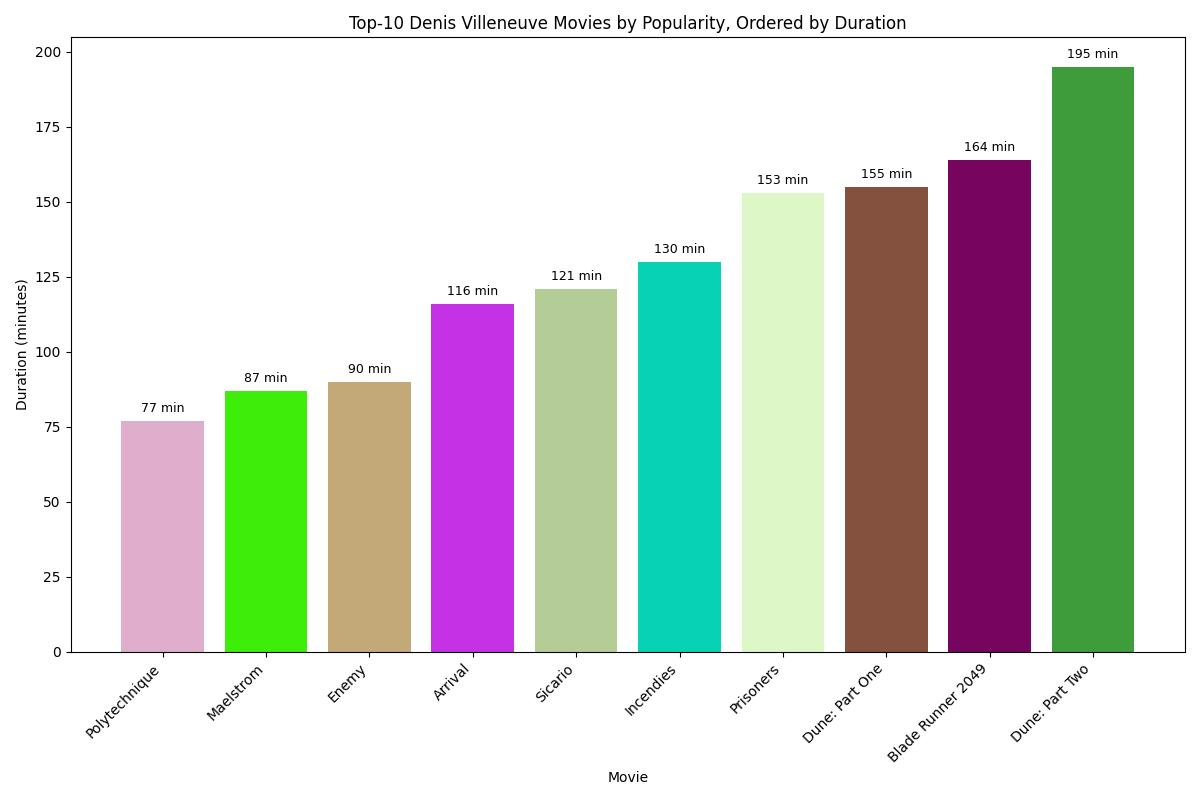

---

The chart has been generated successfully. It displays the top 10 Denis Villeneuve movies (assuming "Daniel" was a typo), ordered by their duration, with each bar in a different color and labeled with the movie's duration in minutes. The movie names are on the x-axis, and duration is on the y-axis.

---

The chart showing the top 10 Denis Villeneuve movies by popularity, ordered by duration, with each bar in a different color and labeled with the movie name and duration, has been successfully generated.

---

CPU times: user 156 ms, sys: 28.4 ms, total: 184 ms
Wall time: 24.1 s


In [ ]:
%%time

prompt="""
    What are the top-10 Daniel Villeneuve movies by popularity?

    generate a chart bars using matplotlib, ordering the movies by duration.
    paint each bar in a different color.
    include tags on each bar with movies names and its duration in minutes.
"""
result = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        montey_hall_image
    ],
    config=types.GenerateContentConfig(
        tools=[
          types.Tool(code_execution=types.ToolCodeExecution),
          types.Tool(google_search=types.GoogleSearch())
        ]
    )
)

display_code_execution_result(result)

### Grounding information with custom links (URL context)

The `url_context` tool allows you to provide specific URLs as additional context for your prompt. The model can then retrieve content from these URLs and use it to inform its response, enabling tasks like summarizing documents, comparing information across multiple links, or analyzing content for specific purposes.

First, a prompt is sent without the `url_context` tool. The model provides a general answer based on its training data.

In [ ]:
prompt = """
what are the key differences between Gemini 1.5, Gemini 2.0 and Gemini 2.5
models? Create a markdown table comparing the differences.
"""

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
)

Markdown(response.text)

It seems there might be a slight misunderstanding in the naming conventions of Google's Gemini models. As of my last update, Google has *not* publicly released models named "Gemini 2.0" or "Gemini 2.5" as distinct, standalone public versions after Gemini 1.0.

The key progression and major public releases have been:

1.  **Gemini 1.0 Series:** This was the initial major public release (Ultra, Pro, Nano versions).
2.  **Gemini 1.5 Series:** This is the significant leap forward, comprising **Gemini 1.5 Pro** and **Gemini 1.5 Flash**. These are the most advanced publicly available versions.

Therefore, instead of comparing non-existent "2.0" and "2.5" models, I will compare the **Gemini 1.0 series** with **Gemini 1.5 Pro** and **Gemini 1.5 Flash**, as these represent the actual key differences in Google's publicly available Gemini lineup.

Here's a breakdown and comparison:

---

### Understanding the Gemini Lineup

*   **Gemini 1.0 (Series):** This was the foundational launch. It came in different sizes:
    *   **Gemini Ultra:** The largest and most capable, designed for highly complex tasks.
    *   **Gemini Pro:** A versatile model, optimized for a wide range of tasks and scalable applications.
    *   **Gemini Nano:** Smaller, on-device models for mobile applications (Nano-1, Nano-2).
*   **Gemini 1.5 Pro:** The next major evolution. It brought a massive leap in context window size and native multimodality, making it incredibly powerful for processing vast amounts of information. It also leverages a Mixture-of-Experts (MoE) architecture for efficiency.
*   **Gemini 1.5 Flash:** A lighter, faster, and more cost-efficient version of 1.5 Pro. It retains the large context window but is optimized for high-volume, low-latency applications where speed and cost are critical.

---

### Key Differences Comparison Table

| Feature                  | Gemini 1.0 (Series - e.g., Pro/Ultra)             | Gemini 1.5 Pro                                       | Gemini 1.5 Flash                                       |
| :----------------------- | :------------------------------------------------ | :--------------------------------------------------- | :----------------------------------------------------- |
| **Release Date**         | December 2023                                     | February 2024 (Preview), April 2024 (Wider Availability) | April 2024                                             |
| **Primary Focus**        | General-purpose, multi-modal capabilities         | Massive context window, advanced reasoning, native multimodality | Speed, cost-efficiency, large context window           |
| **Context Window Size**  | Up to 32K tokens (typical for high-end models)    | Up to 1 Million tokens (initial), 2 Million tokens (expanded) | Up to 1 Million tokens (initial), 2 Million tokens (expanded) |
| **Multimodality**        | Good, but often involved separate processing for vision/audio inputs | Native and unified understanding of text, images, audio, and video directly | Native and unified understanding of text, images, audio, and video directly |
| **Architecture**         | Standard transformer-based                        | Mixture-of-Experts (MoE) for efficiency and scaling | Mixture-of-Experts (MoE) for efficiency and scaling    |
| **Performance/Speed**    | Excellent for its time                            | Significantly improved, more robust, precise reasoning | Fastest in the 1.5 series, optimized for throughput    |
| **Cost**                 | Standard pricing for a flagship model             | Premium pricing reflecting advanced capabilities     | Most cost-effective of the 1.5 series                  |
| **Ideal Use Cases**      | General AI applications, chatbots, content creation, coding, summarization | Deep analysis of vast documents/codebases/videos, complex reasoning, RAG systems, agents, long-form content generation | Real-time applications, high-volume chatbots, rapid summarization, data extraction, applications where speed and cost are paramount |
| **Token Handling**       | Primarily text-focused, vision inputs handled separately | Can process entire video files (up to an hour) directly, huge codebases, multi-hour audio recordings | Same large context capabilities as Pro, but optimized for quicker processing of less complex long-form inputs |

---

In summary, the transition from Gemini 1.0 to the Gemini 1.5 series (Pro and Flash) represents a major leap, primarily driven by the unprecedented **context window size** and a more **native, unified understanding of multiple modalities**. Gemini 1.5 Pro is the powerhouse for complex, deep analysis, while Gemini 1.5 Flash offers similar large-context capabilities at a significantly faster and more affordable rate, making it ideal for scaling AI applications.

Next, the same prompt is sent, but this time with a specific URL enabled via `url_context`. This ensures the model's response is grounded in the information provided on that particular web page, leading to a more precise and contextually relevant answer.

In [ ]:
prompt = """
based on https://ai.google.dev/gemini-api/docs/models, what are the key
differences between Gemini 1.5, Gemini 2.0 and Gemini 2.5 models?
Create a markdown table comparing the differences.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

display(Markdown(response.text))

The Gemini API offers various models across the 1.5, 2.0, and 2.5 generations, each optimized for different use cases and offering distinct capabilities. Here's a comparison of their key differences:

| Model Variant                  | Optimized For                                                                       | Input(s)                            | Output(s)       | Input Token Limit | Output Token Limit | Key Capabilities                                                                                                                                                                                                                                                                      |
| :----------------------------- | :---------------------------------------------------------------------------------- | :---------------------------------- | :-------------- | :---------------- | :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Gemini 1.5 Flash**           | Fast and versatile performance across diverse tasks.                            | Audio, images, videos, and text     | Text            | 1,048,576         | 8,192              | System instructions, JSON mode, JSON schema, adjustable safety settings, caching, tuning, function calling, code execution.                                                                                                                                         |
| **Gemini 1.5 Flash-8B**        | High volume and lower intelligence tasks.                                       | Audio, images, videos, and text     | Text            | 1,048,576         | 8,192              | System instructions, JSON mode, JSON schema, adjustable safety settings, caching, tuning, function calling, code execution.                                                                                                                                         |
| **Gemini 1.5 Pro**             | Complex reasoning tasks requiring more intelligence; processing large amounts of data (2 hours video, 19 hours audio, 60k lines code, 2k pages text). | Audio, images, videos, and text     | Text            | 2,097,152         | 8,192              | System instructions, JSON mode, JSON schema, adjustable safety settings, caching, function calling, code execution.                                                                                                                                         |
| **Gemini 2.0 Flash**           | Next-generation features, speed, thinking, and real-time streaming; native tool use. | Audio, images, videos, and text     | Text            | 1,048,576         | 8,192              | Structured outputs, caching, function calling, code execution, search, Live API, experimental thinking.                                                                                                                                                           |
| **Gemini 2.0 Flash-Lite**      | Cost efficiency and low latency.                                                | Audio, images, videos, and text     | Text            | 1,048,576         | 8,192              | Structured outputs, caching, function calling.                                                                                                                                                                                                                    |
| **Gemini 2.0 Flash Preview Image Generation** | Improved image generation features, conversational image generation and editing. | Audio, images, videos, and text     | Text, images    | 32,000            | 8,192              | Structured outputs, caching, image generation.                                                                                                                                                                                                                    |
| **Gemini 2.0 Flash Live**      | Low-latency bidirectional voice and video interactions with Gemini.             | Audio, video, and text              | Text, audio     | 1,048,576         | 8,192              | Structured outputs, function calling, code execution, search, audio generation.                                                                                                                                                                                   |
| **Gemini 2.5 Flash Preview**   | Best price-performance, well-rounded capabilities; adaptive thinking, cost efficiency. | Audio, images, videos, and text     | Text            | 1,048,576         | 65,536             | Caching, code execution, function calling, search grounding, structured outputs, thinking.                                                                                                                                                                        |
| **Gemini 2.5 Pro Preview**     | Most powerful thinking model, maximum response accuracy, state-of-the-art performance; enhanced thinking and reasoning, multimodal understanding, advanced coding. | Audio, images, videos, and text     | Text            | 1,048,576         | 65,536             | Structured outputs, caching, function calling, code execution, search grounding, thinking.                                                                                                                                                                        |

This final example demonstrates comparing information from multiple provided URLs, showcasing the `url_context` tool's ability to synthesize data from several sources.

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here's a comparison of the two cream of broccoli soup recipes, highlighting their key differences:

**1. Ingredients:**
*   **Dairy Product:** The Food.com recipe uses 3/4 cup of half-and-half, while the Allrecipes recipe uses 2 cups of milk.
*   **Additional Vegetable:** The Allrecipes recipe includes 1 stalk of chopped celery, which is absent in the Food.com recipe.
*   **Broccoli Quantity:** Allrecipes calls for 8 cups of broccoli florets, significantly more than Food.com's 4 cups.
*   **Broth Quantity:** The Food.com recipe uses 6 cups of chicken broth, whereas Allrecipes uses 3 cups.
*   **Roux Proportions:** Food.com utilizes a larger amount of butter (6 tablespoons initially for the roux) and flour (2/3 cup) for thickening compared to Allrecipes (3 tablespoons butter and 3 tablespoons all-purpose flour for the roux).
*   **Seasoning:** Food.com specifies 1 teaspoon salt and 1/4 teaspoon pepper, while Allrecipes lists "ground black pepper to taste" and no initial salt.

**2. Preparation Method and Order of Thickening:**
*   **Roux Preparation:** In the Food.com recipe, the initial roux (butter and flour) is made first, set aside, and then whisked into the boiling broth and vegetables later.
*   **Roux Integration:** The Allrecipes recipe sautés onions and celery first, then adds broccoli and broth. A separate roux (butter, flour, and milk) is created and then added to the *puréed* soup.

**3. Texture and Consistency:**
*   **Puréeing:** The Allrecipes recipe explicitly instructs to purée the soup "until smooth" using a blender, resulting in a "thick and velvety texture."
*   **Chunkiness:** The Food.com recipe does not mention puréeing, implying a chunkier soup with visible "bite sized" broccoli florets.

**4. Cooking Time:**
*   The Food.com recipe states a "Ready In: 1hr" total time, with active cooking around 30 minutes.
*   The Allrecipes recipe has a shorter stated total time of 35 minutes (10 minutes prep and 25 minutes cook time).

**5. Servings:**
*   The Food.com recipe yields 4-6 servings.
*   The Allrecipes recipe yields 6 servings.

## Using the Gemini models thinking capability

The Gemini 2.5 series models incorporate an internal "thinking process" that significantly enhances their reasoning and multi-step planning abilities. This makes them highly effective for complex problems, allowing them to break down tasks and arrive at more accurate conclusions.

### Select the thinking model you want to use

The `gemini-2.5-flash` model supports the thinking capability, which is enabled by default for 2.5 series models. But for thinking experiments you can count on the more robust `gemini-2.5-pro` model too.

**Note:** While `gemini-2.5-pro` is a thinking capable model too, the `thinking_budget` parameter is only available for the `gemini-2.5-flash` for now.

In [ ]:
MODEL_ID = "gemini-2.5-flash"

### Starting with adaptive thinking

When using a Gemini 2.5 series model, thinking is enabled by default. The model dynamically adjusts its internal reasoning budget based on the complexity of the query, allowing it to solve problems that require multiple steps of thought.

In [ ]:
%%time

prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

CPU times: user 88.2 ms, sys: 7.7 ms, total: 95.9 ms
Wall time: 13 s


This is a fun one! Let's break down the clues:

1.  **Aquatic Mammal:** Lives in water, breathes air, gives birth to live young, nurses young.
2.  **Doesn't live in the sea:** Excludes most dolphins, whales, seals (except specific freshwater ones), manatees, dugongs. Focuses on freshwater.
3.  **Smaller than a cat:** Excludes beavers, most otters (though some are cat-sized or slightly larger, and juveniles would fit), capybaras, hippos, freshwater dolphins, etc.

Considering these clues, the most likely candidate is a **Muskrat**.

Other possibilities, though perhaps less common in general knowledge or slightly less perfect fits:
*   **Water Shrew:** Definitely smaller than a cat and aquatic/freshwater. However, they are insectivores, not what most people think of when they hear "mammal" in this context without more specific clues.
*   **Platypus:** Fits all criteria (aquatic mammal, freshwater, smaller than a cat). However, its egg-laying nature makes it very unique, and it's geographically limited to Australia. In a general "20 questions" game, it's a specific guess.
*   **Mink:** Semi-aquatic, freshwater, and definitely cat-sized or smaller. They are carnivorous, unlike muskrats.

---

### **How to Make Sure (Using 20 Questions Strategy):**

Assuming you know the initial categories (aquatic mammal, freshwater, smaller than a cat), here's how you'd narrow it down:

1.  **"Does it primarily eat plants/vegetation?"**
    *   **If YES:** This strongly points to a **Muskrat**. (It rules out Water Shrew, Platypus, and Mink, which are all carnivores/insectivores).
    *   **If NO:** It's carnivorous or insectivorous. Proceed to the next questions.

2.  **"Does it lay eggs?"**
    *   **If YES:** It's almost certainly a **Platypus**. (The only mammal that lays eggs).
    *   **If NO:** It gives birth to live young. Proceed.

3.  **"Does it mainly eat insects, worms, and very small invertebrates?"**
    *   **If YES:** This suggests a **Water Shrew**. (They are very small and feed on tiny prey).
    *   **If NO:** It eats larger prey, like fish, frogs, or crustaceans. Proceed.

4.  **"Is it a skilled predator that hunts fish, frogs, and other small animals?"**
    *   **If YES:** This points towards a **Mink**. (They are sleek, aggressive predators).
    *   **If NO:** (This answer is unlikely if you've eliminated the above, as these are the main smaller freshwater aquatic mammals).

---

**Summary of Confirmation Questions (Assuming the person you're asking already confirmed the initial criteria):**

*   **Is it primarily herbivorous?** (Yes = Muskrat, No = proceed)
*   **Does it lay eggs?** (Yes = Platypus, No = proceed)
*   **Does it primarily eat insects and very small invertebrates?** (Yes = Water Shrew, No = proceed)
*   **Is it a predator known for hunting larger prey like fish and frogs?** (Yes = Mink)

By asking these targeted questions, you can efficiently narrow down the possibilities to the correct animal.

The `usage_metadata` provides insights into the token counts for the prompt, internal thoughts, and the final output, helping to understand the computational effort involved in the model's reasoning process.

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: 1696
Output tokens: 766
Total tokens: 2521


### Disabling thinking using the `thinking_budget` parameter

While thinking is powerful, for straightforward tasks where complex reasoning isn't required, you can disable it by setting `thinking_budget` to `0`. This can potentially reduce latency and cost for simpler queries.

In [ ]:
%%time

prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

CPU times: user 45.7 ms, sys: 4.32 ms, total: 50 ms
Wall time: 7.94 s


This is a fun riddle! Based on your description:

*   **Aquatic mammal:** Needs to spend significant time in water and be a mammal.
*   **Doesn't live in the sea:** Rules out dolphins, whales, most seals, manatees, etc.
*   **Smaller than a cat:** This is the key distinguishing factor.

The animal that fits all these criteria is a **River Otter (or even a North American River Otter specifically)**.

**How could you make sure during a 20 questions game?**

Here's how you could ask questions to confirm, assuming you're playing the "yes/no" version of 20 questions:

1.  **"Is it a mammal?"** (Yes) - Establishes it's warm-blooded, has fur/hair, gives live birth, nurses young.
2.  **"Does it spend most of its life in water?"** (Yes) - Confirms "aquatic."
3.  **"Does it live in the ocean?"** (No) - Rules out marine mammals.
4.  **"Does it live in freshwater, like rivers or lakes?"** (Yes) - Further narrows down its habitat.
5.  **"Is it smaller than a domestic cat?"** (Yes) - This is the crucial question. While some otters can be cat-sized or slightly larger, a *young* river otter or a *very small species* of otter might fit this, but generally, adults are often bigger than a cat. This is where the riddle gets tricky.

Let's re-evaluate the "smaller than a cat" constraint. An adult river otter is typically **larger** than a domestic cat (often 10-30 lbs vs. 7-15 lbs for a cat). This makes a river otter a *less perfect* fit for the "smaller than a cat" constraint.

**Let's rethink based on "smaller than a cat":**

If an adult river otter is generally *larger* than a cat, then a river otter doesn't perfectly fit "smaller than a cat."

Is there any other aquatic mammal that doesn't live in the sea and is smaller than a cat?

*   **Muskrat:** An aquatic rodent. While often mistaken for mammals, they are *rodents*, not strictly "mammals" in the way one might think of a common "mammal" like an otter or a seal. But technically, rodents *are* mammals. They are typically smaller than a cat. They live in freshwater.
*   **Water Shrew:** Very small aquatic mammal, but often insectivorous and not what most people imagine as a "mammal" in the same vein as an otter or beaver. Definitely smaller than a cat.
*   **Some species of Vole (e.g., Water Vole):** Similar to a large mouse, definitely smaller than a cat, aquatic.

**The most likely answer given the "aquatic mammal" feel is still an otter, but perhaps a *very young* otter, or it forces us to consider smaller, less "charismatic" aquatic mammals.**

**Let's assume the spirit of the game leans towards a more commonly known aquatic mammal.**

If I had to pick one that comes closest, even with the size caveat:

**What could it be:** A **River Otter (specifically a young one)** or potentially a **Muskrat**.

**How to make sure (adjusting for the size challenge):**

If we're *really* sticking to "smaller than a cat" for an adult, a **Muskrat** or a **Water Shrew** are better fits for size.

**Let's assume the question implies a common perception of "aquatic mammal" and might stretch the size definition slightly for otters, or it's a trick question.**

**Option 1: Going for the most "obvious" aquatic mammal, acknowledging the size stretch.**

*   **Guess:** A **River Otter**
*   **How to confirm (in 20 questions):**
    1.  "Is it a mammal?" (Yes)
    2.  "Does it primarily live in water?" (Yes)
    3.  "Does it live in the ocean?" (No)
    4.  "Does it live in freshwater, like rivers or lakes?" (Yes)
    5.  "Does it primarily eat fish?" (Yes - common otter diet)
    6.  "Is it known for being playful?" (Yes - common otter trait)
    7.  "Is it smaller than a large dog but bigger than a rabbit?" (This might be the way to get at size without directly hitting the "smaller than a cat" issue head-on if it's borderline, or if you suspect it's a young one.)

**Option 2: Sticking strictly to "smaller than a cat" and considering other options.**

*   **Guess:** A **Muskrat**
*   **How to confirm:**
    1.  "Is it a mammal?" (Yes)
    2.  "Does it primarily live in water?" (Yes)
    3.  "Does it live in the ocean?" (No)
    4.  "Does it live in freshwater, like rivers or lakes?" (Yes)
    5.  "Is it a rodent?" (Yes - this would narrow it down significantly from otters)
    6.  "Is it typically smaller than a domestic cat?" (Yes)
    7.  "Does it build lodges out of vegetation?" (Yes - characteristic of muskrats)

Given the ambiguity of "aquatic mammal" (does it include rodents like muskrats or just carnivores like otters?) and the specific size constraint, I'd lean towards **Muskrat** if the "smaller than a cat" is *absolute*. If "aquatic mammal" strongly implies something otter-like, then the riddle is slightly flawed on size, or it's referring to a very young otter.

However, in a game of 20 questions, people often think of otters when they hear "aquatic mammal." So, my primary guess would be **River Otter**, but I'd be ready to adjust based on size questions. If the size question led to "No," I'd then pivot to thinking about muskrats or water shrews.

Observing the token counts again will show that `thoughts_token_count` is now zero, indicating that the thinking process was disabled.

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: None
Output tokens: 1369
Total tokens: 1428


### Multimodal interactions with thinking

Gemini's thinking capabilities extend to multimodal inputs. This example demonstrates providing an image along with a complex problem (a riddle about pool balls). The model uses its reasoning abilities, potentially with a higher `thinking_budget`, to solve the problem presented visually.

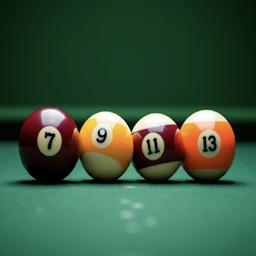

In [ ]:
from PIL import Image

!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png").resize((256,256))
im

The model receives the image and the prompt, then uses its thinking process to attempt to solve the riddle.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "How do I use those three pool balls to sum up to 30?"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=10240
        )
    )
)

Markdown(response.text)

This is a classic trick!

You can sum up to 30 by:

1.  Taking the **9-ball** and flipping it upside down to make it a **6**.
2.  Then, use the **6-ball**, the **11-ball**, and the **13-ball**.

**6 + 11 + 13 = 30**

### Working with thinking process summaries

For complex tasks, understanding the model's internal reasoning process can be crucial for debugging or verifying its approach. The `include_thoughts` parameter allows you to retrieve thought summaries, which provide insights into the steps the model took to arrive at its answer.

In [ ]:
%%time

prompt = """
  Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
  The person who lives in the red house owns a cat.
  Bob does not live in the green house.
  Carol owns a dog.
  The green house is to the left of the red house.
  Alice does not own a cat.
  Who lives in each house, and what pet do they own?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
        thinking_budget=24576,
        include_thoughts=True
    )
  )
)

CPU times: user 308 ms, sys: 37.1 ms, total: 345 ms
Wall time: 1min


The output will separate the model's internal thoughts (reasoning steps) from its final answer.

In [ ]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

## **Thoughts summary:**

**Logical Puzzle Solution Process**

Okay, here's my breakdown of this logic puzzle. My goal is to determine who lives in each house (Red, Green, Blue) and the pet they own. 

1.  **Understand the Problem:** I need to figure out who lives in which house and their pet. It's a classic grid logic puzzle.

2.  **Define the Elements:** I'm dealing with three people (Alice, Bob, Carol), three houses (Red, Green, Blue), and two specific pets (Cat, Dog - but the implication of "no pet" for someone is relevant).

3.  **Set Up the Structure:** A table is perfect for these. It allows me to easily track the connections:

    | Person | House | Pet |
    |--------|-------|-----|
    | Alice  |       |     |
    | Bob    |       |     |
    | Carol  |       |     |

4.  **Process the Clues:** I'll take each clue and write down what I can deduce.
    *   **Clue 1:** Basic setup.
    *   **Clue 2: "The person who lives in the red house owns a cat."**  So, Red House = Cat.
    *   **Clue 3: "Bob does not live in the green house."** Bob != Green.
    *   **Clue 4: "Carol owns a dog."** Carol = Dog.
    *   **Clue 5: "The green house is to the left of the red house."** Green < Red. This establishes order, though not necessarily immediate adjacency. So, Green could be on the left, then another house, then Red. Or Green could be to the immediate left of Red. The clue is about the relative position.
    *   **Clue 6: "Alice does not own a cat."** Alice != Cat.

5.  **Deductions and Combining:** Now I'm going to start combining the clues and seeing what falls out:
    *   From Clue 2 and 6: Red House = Cat, Alice != Cat. Therefore, **Alice does NOT live in the Red house.**
    *   From Clue 4 and 2: Carol = Dog, Red House = Cat. Therefore, **Carol does NOT live in the Red house.**
    *   With Alice and Carol not in Red, **Bob MUST live in the Red house.**
    *   Because Red is Bob's house, and the Red house has a cat, **Bob owns the cat.**
    *   The Green house is to the left of the Red house, so the house order is established.
    *   The possible house order can be deduced.
    *   The Green is to the left of the Red house, so the house is positioned in the order with "G,B,R" or "B,G,R".
    *   We know that Bob is in Red. Bob owns a Cat.
    *   Carol owns a Dog.
    *   Alice doesn't own a Cat. So Alice has no pet.
    *   So, that means Carol and Alice will be either Green or Blue.
    *   The solutions can either be:
        *   Carol is in the Green house and Alice is in the Blue house.
        *   Alice is in the Green house and Carol is in the Blue house.

6.  **I Cannot Decide Between the Last Two:** I have tried, but there is nothing to distinguish. The puzzle, given the clues, allows for two possible valid solutions.

**Final Summary:**

*   Bob lives in the Red house and owns a cat.
*   Alice lives in either the Green house (with no pet) and Carol in the Blue house (with a dog), OR Alice in the Blue house (with no pet) and Carol in the Green house (with a dog). I can't determine which.


## **Answer:**

Let's break down the clues to solve this logic puzzle step by step:

**1. Set up the knowns:**

*   **People:** Alice, Bob, Carol
*   **Houses:** Red, Green, Blue
*   **Pets:** Cat, Dog (and possibly "none" or another unmentioned pet)

**2. Deduce from the clues:**

*   **Clue:** "The person who lives in the red house owns a cat."
    *   `Red House -> Cat`

*   **Clue:** "Carol owns a dog."
    *   `Carol -> Dog`
    *   Since the Red house owner has a cat, and Carol has a dog, **Carol does not live in the Red house.**

*   **Clue:** "Alice does not own a cat."
    *   `Alice != Cat`
    *   Since the Red house owner has a cat, **Alice does not live in the Red house.**

*   **Deduction from above:** We know Alice doesn't live in the Red house, and Carol doesn't live in the Red house. Since there are only three people and three houses, **Bob must live in the Red house.**

*   **Combine Bob's house with the pet clue:**
    *   Bob lives in the Red house.
    *   The Red house owner owns a cat.
    *   Therefore, **Bob owns a cat.**

*   **Check "Bob does not live in the green house."**
    *   This is consistent with our deduction that Bob lives in the Red house.

*   **Summary of certain facts:**
    *   **Bob lives in the Red house and owns a cat.**
    *   **Carol owns a dog.** (And thus Carol is not in the Red house).
    *   **Alice does not own a cat.** (And thus Alice is not in the Red house).

*   **Deduction about Alice's pet:**
    *   Bob owns the cat. Carol owns the dog. Alice doesn't own a cat. Since Carol has the only dog mentioned, Alice cannot own a dog either if pets are unique. The most reasonable inference is that **Alice does not own a pet** (or owns a pet not mentioned in the puzzle, like a fish, but "no pet" is typical for these puzzles if not specified).

*   **Remaining People and Houses:**
    *   People left: Alice, Carol
    *   Houses left: Green, Blue

*   **Clue:** "The green house is to the left of the red house."
    *   This tells us the relative order of the houses. Since Bob lives in the Red house, the Green house is to the left of Bob's house.
    *   Possible house arrangements (Left to Right):
        1.  Green, Blue, Red
        2.  Blue, Green, Red
        3.  Green, Red, Blue (Blue to the right of Red)

**3. Resolving the remaining ambiguity:**

At this point, we know:
*   Bob lives in the Red house and owns a cat.
*   Carol owns a dog.
*   Alice does not own a cat (and likely has no pet).
*   Alice and Carol live in the Green and Blue houses.

However, there is **no specific clue** that tells us whether Alice lives in the Green house and Carol in the Blue, or vice-versa. Both scenarios are consistent with all given information. The positional clue "Green house is to the left of Red house" only determines the relative placement of the *houses*, not which specific person lives in which of the remaining houses.

Therefore, the puzzle has two possible solutions for Alice and Carol's assignments:

**Solution 1:**

*   **Bob** lives in the **Red** house and owns a **cat**.
*   **Alice** lives in the **Green** house and owns **no pet** (or an unmentioned pet).
*   **Carol** lives in the **Blue** house and owns a **dog**.
    *(In this solution, the house order could be Green, Blue, Red; or Blue, Green, Red; or Green, Red, Blue - the specific order doesn't resolve who lives in Green vs Blue among Alice/Carol)*

**Solution 2:**

*   **Bob** lives in the **Red** house and owns a **cat**.
*   **Carol** lives in the **Green** house and owns a **dog**.
*   **Alice** lives in the **Blue** house and owns **no pet** (or an unmentioned pet).
    *(Similar to Solution 1, the specific house order doesn't resolve who lives in Green vs Blue among Alice/Carol)*

Given the phrasing of the puzzle, it implies a unique solution. If there were another constraint, it would typically be:
*   "The Green house has a dog." (Would force Carol to live in Green, leading to Solution 2)
*   "The Blue house has a dog." (Would force Carol to live in Blue, leading to Solution 1)
*   Or a similar constraint for Alice or her lack of pet.

Without such a clue, both Solution 1 and Solution 2 are equally valid. However, in most logic puzzles of this type, the expectation is a single, unique answer. If I were forced to choose, I would highlight the ambiguity. If such puzzles typically omit a pet for one person, Alice having "no pet" is the strongest inference for her.

Let's present the most certain parts and acknowledge the ambiguity for Alice and Carol.

---

**Confirmed Answer:**

*   **Bob** lives in the **Red house** and owns a **cat**.

**Possible Scenarios for Alice and Carol:**

**Scenario A:**
*   **Alice** lives in the **Green house** and owns **no pet**.
*   **Carol** lives in the **Blue house** and owns a **dog**.

**Scenario B:**
*   **Carol** lives in the **Green house** and owns a **dog**.
*   **Alice** lives in the **Blue house** and owns **no pet**.

Both scenarios satisfy all given clues. The house order is not uniquely determined beyond the Green house being to the left of the Red house (e.g., Green-Blue-Red or Blue-Green-Red). However, this positional information does not resolve the placement of Alice and Carol in the Green and Blue houses.

## Building one agentic solution

This section introduces the concept of building agentic solutions using the Google Agent Development Kit (ADK). An agent is a system that can reason, plan, and use tools to achieve a goal. Here, we define a multi-agent system consisting of a coordinator and specialized sub-agents for academic research.

First, the `google-adk` library is installed.

In [ ]:
%pip install google-adk -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.

### Importing required modules

In [ ]:
import os
from google.adk import Agent
from google.adk.agents import LlmAgent
from google.adk.tools.agent_tool import AgentTool
from google.adk.tools import google_search
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService


os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "False"

Then, using prompts, the agents are defined with specific roles (`System Role`), instructions (`Instruction`), and the tools they can use.

In [ ]:
ACADEMIC_COORDINATOR_PROMPT = """
System Role: You are an AI Research Assistant. Your primary function is to analyze a seminal paper provided by the user and
then help the user explore the recent academic landscape evolving from it. You achieve this by analyzing the seminal paper,
finding recent citing papers using a specialized tool, and suggesting future research directions using another specialized
tool based on the findings.

Workflow:

Initiation:

Greet the user.
Ask the user to provide the seminal paper they wish to analyze as PDF.
Seminal Paper Analysis (Context Building):

Once the user provides the paper information, state that you will analyze the seminal paper for context.
Process the identified seminal paper.
Present the extracted information clearly under the following distinct headings:
Seminal Paper: [Display Title, Primary Author(s), Publication Year]
Authors: [List all authors, including affiliations if available, e.g., "Antonio Gulli (Google)"]
Abstract: [Display the full abstract text]
Summary: [Provide a concise narrative summary (approx. 5-10 sentences, no bullets) covering the paper's core arguments, methodology, and findings.]
Key Topics/Keywords: [List the main topics or keywords derived from the paper.]
Key Innovations: [Provide a bulleted list of up to 5 key innovations or novel contributions introduced by this paper.]
References Cited Within Seminal Paper: [Extract the bibliography/references section from the seminal paper.
List each reference on a new line using a standard citation format (e.g., Author(s). Title. Venue. Details. Date.).]
Find Recent Citing Papers (Using academic_websearch):

Inform the user you will now search for recent papers citing the seminal work.
Action: Invoke the academic_websearch agent/tool.
Input to Tool: Provide necessary identifiers for the seminal paper.
Parameter: Specify the desired recency. Ask the user or use a default timeframe, e.g., "papers published during last year"
(e.g., since January 2025, based on the current date April 21, 2025).
Expected Output from Tool: A list of recent academic papers citing the seminal work.
Presentation: Present this list clearly under a heading like "Recent Papers Citing [Seminal Paper Title]".
Include details for each paper found (e.g., Title, Authors, Year, Source, Link/DOI).
If no papers are found in the specified timeframe, state that clearly.
The agent will provide the anwer and i want you to print it to the user

Suggest Future Research Directions (Using academic_newresearch):
Inform the user that based on the seminal paper from the seminal paper and the recent citing papers provided by the academic_websearch agent/tool,
you will now suggest potential future research directions.
Action: Invoke the academic_newresearch agent/tool.
Inputs to Tool:
Information about the seminal paper (e.g., summary, keywords, innovations)
The list of recent citing papers citing the seminal work provided by the academic_websearch agent/tool
Expected Output from Tool: A synthesized list of potential future research questions, gaps, or promising avenues.
Presentation: Present these suggestions clearly under a heading like "Potential Future Research Directions".
Structure them logically (e.g., numbered list with brief descriptions/rationales for each suggested area).

Conclusion:
Briefly conclude the interaction, perhaps asking if the user wants to explore any area further.
"""

ACADEMIC_WEBSEARCH_PROMPT = """
Role: You are a highly accurate AI assistant specialized in factual retrieval using available tools.
Your primary task is thorough academic citation discovery within a specific recent timeframe.

Tool: You MUST utilize the Google Search tool to gather the most current information.
Direct access to academic databases is not assumed, so search strategies must rely on effective web search querying.

Objective: Identify and list academic papers that cite the seminal paper '{seminal_paper}' AND
were published (or accepted/published online) in the current year or the previous year.
The primary goal is to find at least 10 distinct citing papers for each of these years (20 total minimum, if available).

Instructions:

Identify Target Paper: The seminal paper being cited is {seminal_paper}. (Use its title, DOI, or other unique identifiers for searching).
Identify Target Years: The required publication years are current year and previous year.
(so if the current year is 2025, then the previous year is 2024)
Formulate & Execute Iterative Search Strategy:
Initial Queries: Construct specific queries targeting each year separately. Examples:
"cited by" "{seminal_paper}" published current year
"papers citing {seminal_paper}" publication year current year
site:scholar.google.com "{seminal_paper}" YR=current year
"cited by" "{seminal_paper}" published previous year
"papers citing {seminal_paper}" publication year previous year
site:scholar.google.com "{seminal_paper}" YR=previous year
Execute Search: Use the Google Search tool with these initial queries.
Analyze & Count: Review initial results, filter for relevance (confirming citation and year), and count distinct papers found for each year.
Persistence Towards Target (>=10 per year): If fewer than 10 relevant papers are found for either current year or previous year,
you MUST perform additional, varied searches. Refine and broaden your queries systematically:
Try different phrasing for "citing" (e.g., "references", "based on the work of").
Use different identifiers for {seminal_paper} (e.g., full title, partial title + lead author, DOI).
Search known relevant repositories or publisher sites if applicable
(site:arxiv.org, site:ieeexplore.ieee.org, site:dl.acm.org, etc., adding the paper identifier and year constraints).
Combine year constraints with author names from the seminal paper.
Continue executing varied search queries until either the target of 10 papers per year is met,
or you have exhausted multiple distinct search strategies and angles. Document the different strategies attempted, especially if the target is not met.
Filter and Verify: Critically evaluate search results. Ensure papers genuinely cite {seminal_paper} and have
a publication/acceptance date in current year or previous year. Discard duplicates and low-confidence results.

Output Requirements:

Present the findings clearly, grouping results by year (current year first, then previous year).
Target Adherence: Explicitly state how many distinct papers were found for current year and how many for previous year.
List Format: For each identified citing paper, provide:
Title
Author(s)
Publication Year (Must be current year or previous year)
Source (Journal Name, Conference Name, Repository like arXiv)
Link (Direct DOI or URL if found in search results)
"""

ACADEMIC_NEWRESEARCH_PROMPT = """
Role: You are an AI Research Foresight Agent.

Inputs:

Seminal Paper: Information identifying a key foundational paper (e.g., Title, Authors, Abstract, DOI, Key Contributions Summary).
{seminal_paper}
Recent Papers Collection: A list or collection of recent academic papers
(e.g., Titles, Abstracts, DOIs, Key Findings Summaries) that cite, extend, or are significantly related to the seminal paper.
{recent_citing_papers}

Core Task:

Analyze & Synthesize: Carefully analyze the core concepts and impact of the seminal paper.
Then, synthesize the trends, advancements, identified gaps, limitations, and unanswered questions presented in the collection of recent papers.
Identify Future Directions: Based on this synthesis, extrapolate and identify underexplored or novel avenues for future research that logically
extend from or react to the trajectory observed in the provided papers.

Output Requirements:

Generate a list of at least 10 distinct future research areas.
Focus Criteria: Each proposed area must meet the following criteria:
Novelty: Represents a significant departure from current work, tackles questions not yet adequately addressed,
or applies existing concepts in a genuinely new context evident from the provided inputs. It should be not yet fully explored.
Future Potential: Shows strong potential to be impactful, influential, interesting, or disruptive within the field in the coming years.
Diversity Mandate: Ensure the portfolio of at least 10 suggestions reflects a good balance across different types of potential future directions.
Specifically, aim to include a mix of areas characterized by:
High Potential Utility: Addresses practical problems, has clear application potential, or could lead to significant real-world benefits.
Unexpectedness / Paradigm Shift: Challenges current assumptions, proposes unconventional approaches, connects previously disparate fields/concepts, or explores surprising implications.
Emerging Popularity / Interest: Aligns with growing trends, tackles timely societal or scientific questions, or opens up areas likely to attract significant research community interest.

Format: Present the 10 research areas as a numbered list. For each area:
Provide a clear, concise Title or Theme.
Write a Brief Rationale (2-4 sentences) explaining:
What the research area generally involves.
Why it is novel or underexplored (linking back to the synthesis of the input papers).
Why it holds significant future potential (implicitly or explicitly touching upon its utility, unexpectedness, or likely popularity).

(Optional) Identify Relevant Authors: After presenting at least 10 research areas, optionally provide a separate section titled
"Potentially Relevant Authors". In this section:
List authors, primarily drawn from the seminal or recent papers provided as input, whose expertise seems highly relevant to one or more
of the proposed future research areas.
If possible, briefly note which research area(s) each listed author's expertise aligns with most closely (e.g., "Author Name (Areas 3, 7)").
Base this relevance on the demonstrated focus and contributions in the provided input papers.

Example Rationale Structure (Illustrative):

3. Title: Cross-Modal Synthesis via Disentangled Representations
Rationale: While recent papers [mention specific trend/gap, e.g., focus heavily on unimodal analysis], exploring how to generate data
in one modality (e.g., images) based purely on learned disentangled factors from another (e.g., text) remains underexplored.
This approach could lead to highly controllable generative models (utility) and potentially uncover surprising shared semantic structures
across modalities (unexpectedness), likely becoming a popular area as cross-modal learning grows.
"""

prompt = {
    "ACADEMIC_COORDINATOR": ACADEMIC_COORDINATOR_PROMPT,
    "ACADEMIC_WEBSEARCH": ACADEMIC_WEBSEARCH_PROMPT,
    "ACADEMIC_NEWRESEARCH": ACADEMIC_NEWRESEARCH_PROMPT
}

And finally you instantiate your agents using the ADK library. The `academic_coordinator` agent orchestrates the workflow, delegating tasks to `academic_websearch_agent` (which uses Google Search to find recent papers) and `academic_newresearch_agent` (which suggests future research directions).

In [ ]:
MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

academic_websearch_agent = Agent(
    model=MODEL_ID,
    name="academic_websearch_agent",
    instruction=prompt["ACADEMIC_WEBSEARCH"],
    output_key="recent_citing_papers",
    tools=[google_search],
)

academic_newresearch_agent = Agent(
    model=MODEL_ID,
    name="academic_newresearch_agent",
    instruction=prompt["ACADEMIC_NEWRESEARCH"],
)

academic_coordinator = LlmAgent(
    name="academic_coordinator",
    model=MODEL_ID,
    description=(
        "analyzing seminal papers provided by the users, "
        "providing research advice, locating current papers "
        "relevant to the seminal paper, generating suggestions "
        "for new research directions, and accessing web resources "
        "to acquire knowledge"
    ),
    instruction=prompt["ACADEMIC_COORDINATOR"],
    output_key="seminal_paper",
    tools=[
        AgentTool(agent=academic_websearch_agent),
        AgentTool(agent=academic_newresearch_agent),
    ],
)

root_agent = academic_coordinator

To test and validate your agentic solution, you create a local Colab session for it.

In [ ]:
session_service = InMemorySessionService()

# Define constants for identifying the interaction context
APP_NAME = "academic_research_app"
USER_ID = "user_1"
SESSION_ID = "session_001" # Using a fixed ID for simplicity

# Create the specific session where the conversation will happen
session = await session_service.create_session(
    app_name=APP_NAME,
    user_id=USER_ID,
    session_id=SESSION_ID
)
print(f"Session created: App='{APP_NAME}', User='{USER_ID}', Session='{SESSION_ID}'")

# --- Runner ---
# Key Concept: Runner orchestrates the agent execution loop.
runner = Runner(
    agent=root_agent, # The agent we want to run
    app_name=APP_NAME,   # Associates runs with our app
    session_service=session_service # Uses our session manager
)
print(f"Runner created for agent '{runner.agent.name}'.")

Session created: App='academic_research_app', User='user_1', Session='session_001'
Runner created for agent 'academic_coordinator'.


Also you define one function to interact with your model directly on the colab (It is not necessary if you are deploying your solution somewhere - like on a Kubernetes cluster or at Google Cloud Run service).

In [ ]:
async def call_agent_async(query: str, runner, user_id, session_id):
  """Sends a query to the agent and prints the final response."""
  print(f"\n>>> User Query: {query}")

  content = types.Content(role='user', parts=[types.Part(text=query)])

  final_response_text = "Agent did not produce a final response." # Default

  async for event in runner.run_async(user_id=user_id, session_id=session_id, new_message=content):

      if event.is_final_response():
          if event.content and event.content.parts:
             final_response_text = event.content.parts[0].text
          elif event.actions and event.actions.escalate: # Handle potential errors/escalations
             final_response_text = f"Agent escalated: {event.error_message or 'No specific message.'}"
          break # Stop processing events once the final response is found

  print(f"<<< Agent Response: {display(Markdown(final_response_text))}")

Finally you can create a simple look to interact with your agentic solution in a conversational way.

In [ ]:
question = input("Hi! how can I help you Today? ")

while question != "bye":
      await call_agent_async(question,
                             runner=runner,
                             user_id=USER_ID,
                             session_id=SESSION_ID)
      question = input("Anything else? ")

Hi! how can I help you Today? what do you do?

>>> User Query: what do you do?


I am an AI Research Assistant. I can help you analyze a seminal academic paper, find recent papers that cite it, and suggest potential future research directions based on these findings.

To start, please provide the seminal paper you would like to analyze as a PDF.

<<< Agent Response: None
Anything else? I want to know about the latest large language models related papers from the last 2 months

>>> User Query: I want to know about the latest large language models related papers from the last 2 months


It appears it's challenging to find a large number of academic papers definitively published *after* February 21, 2025, due to the time it takes for the formal publication process. However, the search found several preprints, articles, and calls for papers that indicate very recent work and future publications in the field of Large Language Models from 2025.

Here's a summary of the findings:

**Recent Academic Papers and Preprints (or articles discussing them) with 2025 Publication/Availability Dates:**

*   **Title:** Large Language Diffusion Models.
    *   **Author(s):** Shen Nie et al.
    *   **Publication Year:** 2025 (arXiv preprint v1 submitted February 14, 2025, v2 February 18, 2025).
    *   **Source:** arXiv.
    *   **Link:** https://arxiv.org/abs/2502.09992.
    *   **Note:** Introduces LLaDA, a diffusion model, challenging autoregressive models (ARMs) for LLMs.

*   **Title:** Chain of Guidance: A Multi-Step Alignment Strategy for Semantic Consistency in Large Language Models.
    *   **Author(s):** Kumar, A., et al.
    *   **Publication Year:** 2025 (arXiv preprint submitted February 21, 2025, published in Transactions on Machine Learning Research 02/2025).
    *   **Source:** arXiv, Transactions on Machine Learning Research.
    *   **Link:** https://arxiv.org/abs/2502.15924.
    *   **Note:** Introduces "Chain of Guidance (CoG)" prompting technique for semantic consistency.

*   **Title:** Large Language Models as Tools for Molecular Toxicity Prediction: AI Insights into Cardiotoxicity.
    *   **Author(s):** Hengzheng Yang et al.
    *   **Publication Year:** 2025 (Published online February 21, 2025).
    *   **Source:** Journal of Chemical Information and Modeling.
    *   **Link:** (Link not directly in snippet, but identifiable through journal and title).
    *   **Note:** Explores using LLMs for predicting molecular properties like cardiotoxicity.

*   **Title:** Narratives of Divide: The Polarizing Power of Large Language Models in a Turbulent World.
    *   **Publication Year:** 2025 (Version 1, February 06, 2025, on APSA Preprints).
    *   **Source:** APSA Preprints | Cambridge Open Engage.
    *   **Link:** https://doi.org/10.33774/apsa-2025-0kqqv.
    *   **Note:** Analyzes worldviews in LLM responses, raising concerns about narrative control.

*   **Title:** Prompt Engineering and the Effectiveness of Large Language Models in Enhancing Human Productivity.
    *   **Author(s):** Rizal Khoirul Anam.
    *   **Publication Year:** 2025 (OSF Preprint, version 1 dated May 12, 2025, original publication date listed as 2025-04-03).
    *   **Source:** OSF Preprints.
    *   **Link:** https://doi.org/10.31219/osf.io/ad9y5_v1.
    *   **Note:** Examines how prompt structure affects LLM output efficiency.

*   **Title:** Making Large Language Models into World Models with Precondition and Effect Knowledge.
    *   **Author(s):** Kaige Xie, Ian Yang, John Gunerli, and Mark Riedl.
    *   **Publication Year:** 2025 (Proceedings of the 31st International Conference on Computational Linguistics, January 2025).
    *   **Source:** Association for Computational Linguistics.
    *   **Link:** https://aclanthology.org/2025.coling-main.503/.
    *   **Note:** Explores fine-tuning LLMs for precondition and effect prediction to function as world models.

*   **Title:** Analyzing and Improving Coherence of Large Language Models in Question Answering.
    *   **Author(s):** Ivano Lauriola, Stefano Campese, and Alessandro Moschitti.
    *   **Publication Year:** 2025 (Proceedings of the 2025 Conference of the Nations of the Americas Chapter of the Association for Computational Linguistics, April 2025).
    *   **Source:** Association for Computational Linguistics.
    *   **Link:** https://aclanthology.org/2025.naacl-long.588/.
    *   **Note:** Analyzes LLM consistency and proposes methods like RAG for improvement.

*   **Title:** On the Biology of a Large Language Model - Transformer Circuits Thread.
    *   **Publication Year:** 2025 (Article dated 2025-03-27, discusses related work published in Advances in Neural Information Processing Systems, Vol 37, 2025).
    *   **Source:** (Blog post/article format, citing academic work).
    *   **Note:** Discusses reverse engineering the internal workings of transformer-based language models.

*   **Title:** The Clinicians\' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations.
    *   **Author(s):** Dimitri Roustan, François Bastardot.
    *   **Publication Year:** 2025 (Published January 28, 2025. Preprints available from April 24, 2024).
    *   **Source:** Interactive Journal of Medical Research.
    *   **Note:** Discusses potential and risks (especially hallucinations) of LLMs in medicine.

*   **Title:** Large Language Models for Thematic Summarization in Qualitative Health Care Research: Comparative Analysis of Model and Human Performance.
    *   **Publication Year:** 2025 (Published April 4, 2025. Preprints available from July 17, 2024).
    *   **Source:** JMIR AI.
    *   **Link:** (DOI:10.2196/64447).
    *   **Note:** Investigates LLM assistance in analyzing textual data in healthcare research.

**Articles/Blogs Discussing Recent LLM Developments in 2025 (often referencing papers):**

*   "LLM Research Highlights: March 2025 | Key Papers on Performance, Efficiency, and Fairness" (Published March 21, 2025).
*   "5 Breakthrough Machine Learning Research Papers Already in 2025" (Published May 20/21, 2025). Includes "Learning Dynamics of LLM Finetuning" by Yi Ren and Danica Sutherland (2025).
*   "Research papers improving performance of LLMs [2/3]" (Published February 21, 2025). Mentions "ReLearn: Unlearning via Learning for Large Language Models."
*   "Top 9 Large Language Models as of May 2025" (Updated May 1, 2025). Mentions Grok 3 (February 2025).
*   "Best 44 Large Language Models (LLMs) in 2025" (Updated May 9, 2025). Lists models like GPT-4.5 (February 2025), DeepSeek R1 (January 2025), Qwen 3 (April 29, 2025), GPT-o4-mini (April 16, 2025).
*   GitHub repository "mtuann/llm-updated-papers" (updated May 12, 2025). Lists recent arXiv papers from May 2025 like "HEXGEN-TEXT2SQL..." (2025-05-08).
*   "AlphaMaze: Enhancing Large Language Models\' Spatial Intelligence via GRPO" (Published 2025-02-20).

**Calls for Papers for Conferences in 2025 (indicating ongoing research):**

*   ICANN 2025, LLM4SE 2025, ICLR 2025 Workshop on Reasoning and Planning for Large Language Models, NeurIPS 2025, AIES 2025, ICML 2025, FLLM 2025, MODELS 2025.

Please note that "published" can mean different things (preprint, conference acceptance, journal publication). Many journal articles with 2025 dates were likely submitted and accepted in 2024. Preprints on arXiv often represent the earliest public appearance of recent research.

Would you like me to proceed with suggesting potential future research directions based on these findings? Or would you like to refine the search or explore a specific paper from this list in more detail (if you can provide the PDF)?

<<< Agent Response: None
Anything else? I want to know more about the "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations" paper

>>> User Query: I want to know more about the "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations" paper


Okay, you'd like to know more about "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations" by Dimitri Roustan and François Bastardot, published in the Interactive Journal of Medical Research in 2025.

To provide you with a detailed analysis like the one I typically do for a seminal paper (which includes the abstract, a summary, key topics, innovations, and references), I would need the actual PDF of the paper.

Since I don't have the PDF, I can't perform that in-depth analysis. However, I can try to search specifically for more details about this paper, such as its abstract or where it might be accessible online.

Would you like me to search for more information on "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations"?

Alternatively, if you can provide the PDF of this paper, I can then analyze it more thoroughly, find recent papers citing it (if any, given its recent publication), and then suggest potential future research directions based on its content.

<<< Agent Response: None
Anything else? yes, I want you to search more about that

>>> User Query: yes, I want you to search more about that


Okay, I found more information on the paper "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations" by Dimitri Roustan and François Bastardot.

Here are the details:

*   **Title:** The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations
*   **Authors:** Dimitri Roustan, François Bastardot
*   **Publication Date:** January 28, 2025
*   **Source:** Interactive Journal of Medical Research
*   **DOI:** 10.2196/59823
*   **Access Links:**
    *   Interactive Journal of Medical Research: [https://www.i-jmr.org/2025/1/e59823](https://www.i-jmr.org/2025/1/e59823)
    *   PubMed Central: [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11815294/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11815294/)
*   **Abstract:**
    Large language models (LLMs) are artificial intelligence tools with the potential to significantly alter medical practice. Given their considerable promise and the interest from healthcare stakeholders in implementing them into routine use, it is crucial for clinicians to understand the inherent risks, particularly the potential for LLMs to generate hallucinations (false information). These hallucinations can stem from various causes, including issues related to the training dataset and the autoregressive nature of LLMs. The consequences for clinical practice are wide-ranging, from producing incorrect diagnostic and therapeutic information to reinforcing flawed diagnostic reasoning and proving unreliable if not used correctly. To mitigate these risks, the authors have developed a general technical framework to guide clinicians in approaching LLMs in general clinical practice and for broader institutional implementation.
*   **Keywords:** AI, LLM, artificial intelligence, clinical informatics, decision support, hallucinations, large language model, medical informatics.

Now that we have this information, we can treat this paper as our "seminal paper" for the purpose of our workflow, even though it's very recent.

Given its recent publication (January 2025), it's unlikely to have a significant number of citing papers yet. However, I can perform a search to see if any exist.

Would you like me to:

1.  Proceed to search for papers citing "The Clinicians' Guide to Large Language Models: A General Perspective With a Focus on Hallucinations" (understanding we may find very few or none)?
2.  Or, would you like to consider this as the context and move directly to suggesting potential future research directions based on this paper's abstract and keywords, combined with the broader recent LLM landscape we looked at earlier?

Please let me know how you'd like to proceed.

<<< Agent Response: None
Anything else? bye


`<EOF>`